# **F20AA - Applied Text Analytics - UG Group 2**

Kaggle Competition Best Score - 80.2%

Colab Link: https://colab.research.google.com/drive/1JPpd1RGI21OlzllwJheSI3eOJ801Xhni?usp=sharing

**Group Members** -

*   Binil Johnson - H00419775
*   Fathima Ismath - H00385662
*   Ibrahim Rathwala - H00403230

**Work Distribution**

- **Ibrahim Rathwala**  
  Responsible for data visualization and exploration, as well as modeling text as a sequence. He developed the visual analysis components and implemented sequence-based models to capture contextual information in the text.

- **Binil Johnson**  
  Focused on the vector space model and feature representation, along with model training, selection, and hyperparameter tuning. He implemented various text representation techniques and optimized multiple classification models using cross-validation.

- **Fathima Ismath**  
  Handled text processing and normalization, and led the topic modeling of high and low ratings. She developed the text cleaning pipeline and applied topic modeling techniques to uncover underlying themes in the reviews.

All team members collaborated on integrating the codebase, tracking project progress, and preparing for the report and final presentation.


**Outline**

*   Data Visualization and Exploration
*   Text Processing and Normalization
*   Vector Space Model and Feature Representation
*   Model Training, Selection and Hyperparameter Tuning
*   Modelling Text as Sequence
*   Topic Modelling of high and low ratings



# Imports

In [ ]:
! pip install emoji contractions tensorflow textblob

In [ ]:
!pip install numpy==1.23.5
!pip install pyLDAvis==3.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.6 MB/s eta 0:00:00
  Installing build dependencies ... canceled
^C


In [ ]:
! pip install --upgrade numpy gensim mglearn wordcloud pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import csv
import time
import random
import re
import string
import warnings
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
import spacy
import contractions
import emoji
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import gensim
from gensim import corpora
from gensim.models import KeyedVectors, FastText, Word2Vec, LdaModel, CoherenceModel
from scipy.sparse import hstack
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from gensim.test.utils import datapath
from tqdm import tqdm
tqdm.pandas(desc="Progress")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim.downloader as api
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import mglearn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import ast
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from transformers import (
    BertTokenizer,
    BertModel,
    RobertaTokenizer,
    RobertaModel,
    AdamW,
    get_linear_schedule_with_warmup
)

lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
snowball = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. Data Visualization And Exploration

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW2/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW2/test.csv')

In [ ]:
# Create a dictionary to loop through each dataset
datasets = {'Train Dataset': df}

for name, dataset in datasets.items():
    print(f"\n{'='*50}\nDataset: {name}")

    # Print data shape
    print("Data Shape:", dataset.shape)

    # Display data info
    print("\nData Info:")
    dataset.info()

    # Display the first few rows
    print("\nFirst 5 Rows:")
    print(dataset.head())

    # Count duplicate rows
    duplicate_count = dataset.duplicated().sum()
    print("\nNumber of duplicate rows:", duplicate_count)

    # Remove duplicate rows
    dataset.drop_duplicates(inplace=True)
    print("New Data Shape:", dataset.shape)


Dataset: Train Dataset
Data Shape: (309131, 2)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309131 entries, 0 to 309130
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   309131 non-null  int64 
 1   Text    309131 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.7+ MB

First 5 Rows:
   Score                                               Text
0      5  I received this product early from the seller!...
1      5  *****<br />Numi's Collection Assortment Melang...
2      5  I was very careful not to overcook this pasta,...
3      5  Buying this multi-pack I was misled by the pic...
4      5  These bars are so good! I loved them warmed up...

Number of duplicate rows: 825
New Data Shape: (308306, 2)


In [ ]:
df['Score'].describe()

,Score
count,308306.000000
mean,4.180610
std,1.311546
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Distribution counts:
 Score
1     28385
2     16265
3     23248
4     43792
5    196616
Name: count, dtype: int64


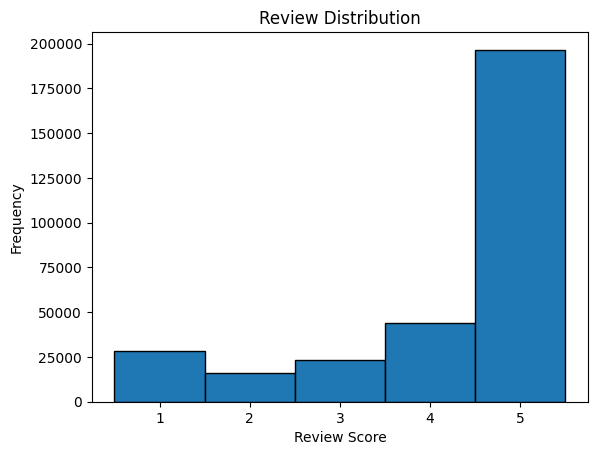

In [ ]:
# Compute the distribution using value_counts, sorted by score
distribution_counts = df['Score'].value_counts().sort_index()

# Display the distribution counts (optional)
print("Distribution counts:\n", distribution_counts)

# Create histogram with custom bins for centered scores
plt.hist(df['Score'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title("Review Distribution")
plt.xlabel("Review Score")
plt.ylabel("Frequency")

plt.show()

In [ ]:
# Create a new column for review length (word count)
df['review_length'] = df['Text'].apply(lambda x: len(str(x).split()))


Rating 1:
 Lowest review length = 3
 Highest review length = 1751



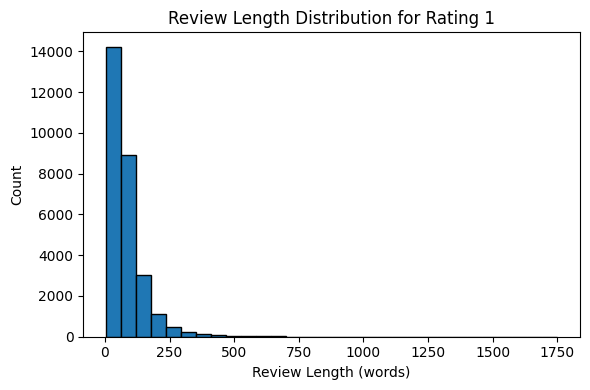


Rating 2:
 Lowest review length = 6
 Highest review length = 1612



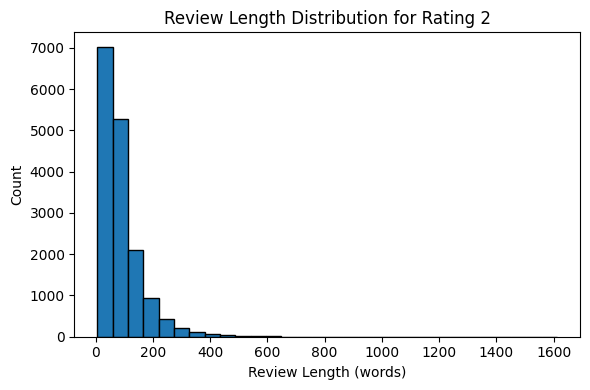


Rating 3:
 Lowest review length = 7
 Highest review length = 3432



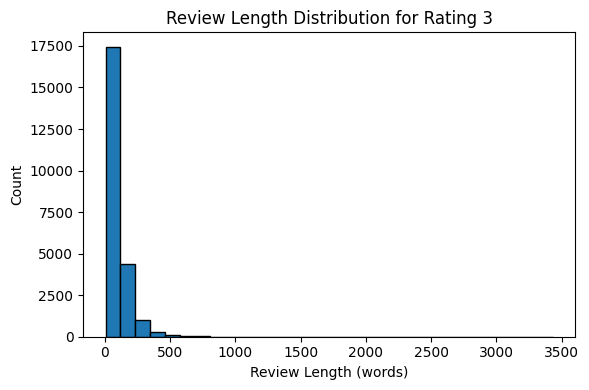


Rating 4:
 Lowest review length = 6
 Highest review length = 2061



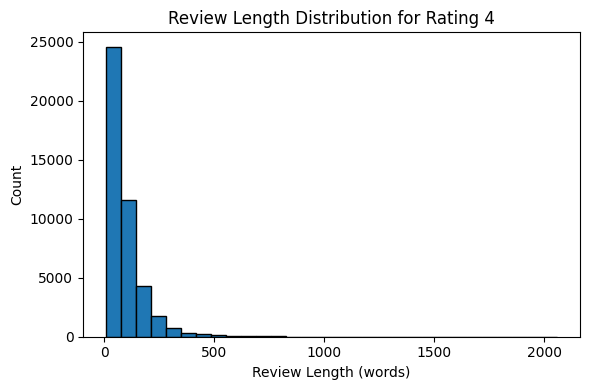


Rating 5:
 Lowest review length = 3
 Highest review length = 2520



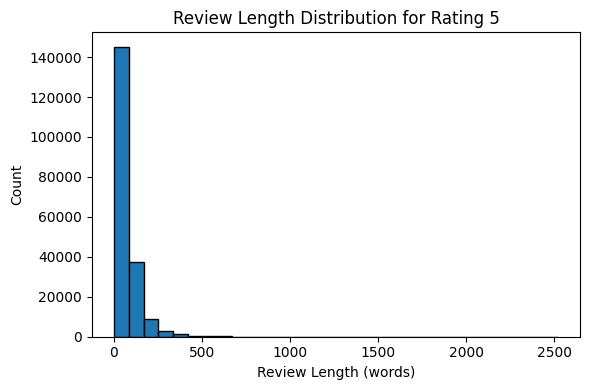

In [ ]:
for rating in range(1,6):
    subset = df[df['Score'] == rating]

    # Get the lowest and highest review lengths
    lowest = subset['review_length'].min()
    highest = subset['review_length'].max()
    print(f"\nRating {rating}:\n Lowest review length = {lowest}\n Highest review length = {highest}\n")

    # Plot histogram for the current rating
    plt.figure(figsize=(6, 4))
    plt.hist(subset['review_length'], bins=30, edgecolor='black')
    plt.title(f'Review Length Distribution for Rating {rating}')
    plt.xlabel('Review Length (words)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

The training dataset consists of 309,131 records, each containing a review in the "Text" column and a corresponding rating in the "Score" column on a five-point scale. At this stage, it is noted that 825 duplicate rows exist. These duplicates will be removed in a later phase to ensure the accuracy of our analysis.

The rating distribution is noticeably unbalanced. There are 28,385 one star reviews, 16,265 two star reviews, 23,248 three star reviews, 43,792 four star reviews, and 196,616 five star reviews. The predominance of five star reviews indicates that a large proportion of the feedback is highly positive. This uneven distribution may reflect genuine customer satisfaction or be influenced by other factors such as the nature of the product or customer behavior.

The review lengths provide additional insights into the dataset. One star reviews vary from 3 to 1,751 words, while two star reviews range from 6 to 1,612 words. Three star reviews exhibit the widest range, with lengths spanning from 7 to 3,432 words. Four star reviews vary between 6 and 2,061 words, and five star reviews range from 3 to 2,520 words. This variability suggests that while some customers express their opinions with brief comments, others provide more detailed feedback. The wide range in three star reviews may suggest that customers with mixed experiences tend to provide more detailed feedback that includes both positive and negative points.

In conclusion, initial exploration has highlighted key characteristics of the dataset. The presence of duplicate entries emphasizes the importance of data cleaning. The diversity in review lengths across all ratings offers further dimensions for feature engineering. Together, these findings set a solid foundation for the upcoming stages.

# 2.	Text Processing and Normalization

Thoroughly experiment with different text processing and normalization alternatives. Explain the trade-off and benefits of using each and justify their effectiveness for the current data set.  


Text normalization is a crucial preprocessing step in any Natural Language Processing (NLP) pipeline. It standardizes textual input to improve model performance, reduce vocabulary size, and ensure consistency across tokens.

## Data Preprocessing

#### Text Cleaning and Preprocessing

We used a custom clean_text() function with the following steps:

- **HTML Removal**: Removed tags like \<br> and \<div> using BeautifulSoup to retain only meaningful textual content.
- **URL Removal**: Removed links starting with **http** or **www** to eliminate external references.
- **Case Normalization**: Converted all text to lowercase to treat words like Great and great the same.
- **Contraction Expansion**: Handled contractions like "can't" to "cannot" using the contractions library for better token alignment.
- **Email, Handles, Hashtags Removal**: Removed elements like @username, #topic, and emails.
- **Punctuation and Symbols**: Removed all punctuation using Python’s string.punctuation.
- **Non-ASCII Characters**: Filtered out foreign scripts and emojis not useful for this stage.
- **Whitespace Normalization**: Removed excess spaces and newline characters.


This preprocessing retains:
- Alphabets
- Numbers (useful for expressing price, quantity, size and year)
- Sentiment expressions

This resulted in a clean textual format that improves model interpretability and vectorizer performance.



In [ ]:
len(df)

309131

In [ ]:
# Suppress specific BeautifulSoup warning
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)

duplicate_rows = df[df.duplicated()]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")
df = df.drop_duplicates()

def clean_text(text):
    """Clean and preprocess text data."""
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Convert ellipses or multiple dots to a single dot
    text = re.sub(r'\.{2,}', '.', text)

    # Expand contractions (e.g., "don't" → "do not")
    text = contractions.fix(text)

    # Remove punctuation, emails, handles, hashtags, and underscores
    text = re.sub(r'[@#]\w+|\S+@\S+|\b\w+_\w+\b', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove newline characters and excess whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text
df['clean_text'] = df['Text'].apply(clean_text)


Total duplicate rows: 825


There were 825 duplicate rows which were dropped to ensure dataset quality.

In [ ]:
sample_text = "I can't believe it's already 7 pm! She's going to John's party."
cleaned_text = clean_text(sample_text)
print(cleaned_text)

i cannot believe it is already 7 pm she is going to johns party


In [ ]:
# Average number of words per review
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
avg_words = df['word_count'].mean()

# Max and Min
max_words = df['word_count'].max()
min_words = df['word_count'].min()

# Most common words
all_words = ' '.join(df['clean_text']).split()
common_words = Counter(all_words).most_common(10)

# Display results
print(f"Average words per review: {avg_words:.2f}")
print(f"Shortest review: {min_words} words")
print(f"Longest review: {max_words} words")
print("Top 10 most common words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

Average words per review: 79.47
Shortest review: 3 words
Longest review: 3371 words
Top 10 most common words:
the: 994085
i: 876806
and: 687742
a: 647293
it: 578872
to: 548222
is: 509477
of: 431075
this: 362239
not: 324165


 Review Length Insights:
Average length: Reviews contain ~79 words on average, indicating users generally provide substantial feedback, rather than short phrases.

Shortest review: At only 3 words, some reviews are minimal, possibly just expressing dissatisfaction or approval (e.g., “Tastes like soap”).

Longest review: A review with 3371 words shows that some users treat product reviews like detailed blog posts or testimonials — this could heavily influence topic modeling and word distributions.

The top 10 most common words are all stopwords, such as the, i, and, a, it. This highlights the importance of stopword removal during preprocessing, as they dominate frequency counts but carry little semantic value for modeling.

### Emojis

Before proceeding with text normalization and tokenization, we checked the dataset for the presence of emojis using the emoji Python package. Emojis often carry emotional and contextual information that can be relevant in review classification tasks.

In [ ]:
# Function to count total emojis in a dataset column
def count_total_emojis(df, clean_text):
    """Count total number of emojis in a given column."""
    return df['clean_text'].apply(emoji.emoji_count).sum()

# Check total number of emojis in the dataset
total_emojis = count_total_emojis(df, 'clean_text')

# Print total emoji count
print("Total number of emojis in the dataset:", total_emojis)

Total number of emojis in the dataset: 0


Since no emojis were present in the cleaned dataset, no further emoji-specific handling (like mapping or sentiment translation) was required.

## Tokenisation
Tokenization is the process of splitting text into individual words or tokens.

We tokenized the cleaned text using word_tokenize() from NLTK, which breaks each sentence into individual words. Tokenization is essential for steps like lemmatization, stemming, and vectorization.

Tokenization prepares text for vectorization (e.g., TF-IDF, Word2Vec).
It helps in understanding text structure and frequency.

We compared two tokenisers - NLTK and Tweet Tokeniser.
- word_tokenize: Based on the Punkt sentence tokenizer; suited for standard grammar.
- TweetTokenizer: Designed for informal texts (e.g., tweets), handles emojis, hashtags, and contractions better.

Vocabulary Comparison:
- word_tokenize vocabulary size: 275,093
- TweetTokenizer vocabulary size: 269,511
NLTK tokenizer was preferred over spaCy due to faster performance on our large dataset (300k+ rows). It also had a lower memory usage, especially helpful in environments like Google Colab. The spaCy tokenizer was consuming


In [ ]:
# NLTK Tokenization
def nltk_tokenizer(text):
    """Tokenization using NLTK."""
    return word_tokenize(text)
df['nltk_tokens'] = df['clean_text'].apply(nltk_tokenizer)
nltk_vocab_size = len(set([word for tokens in df['nltk_tokens'] for word in tokens]))

In [ ]:
print("NLTK tokens sample: ", df['nltk_tokens'].iloc[1])
print("NLTK total vocab size: ", nltk_vocab_size)


NLTK tokens sample:  ['numis', 'collection', 'assortment', 'melange', 'includes5', 'herbal', 'teas', 'caffeinefree', 'also', 'called', 'teasans', 'dry', 'desert', 'lime', 'lime', 'herbal', 'teasan', 'fields', 'of', 'gold', 'lemongrass', 'herbal', 'teasan', 'red', 'mellow', 'bush', 'rooibos', 'herbal', 'teasan', 'bushmens', 'brew', 'honeybush', 'herbal', 'teasan', 'simply', 'mint', 'moroccan', 'mint2', 'green', 'teas', 'lower', 'in', 'caffeine', 'temple', 'of', 'heaven', 'gunpowder', 'green', 'tea', 'monkey', 'king', 'jasmine', 'green', 'tea2', 'black', 'teas', 'contain', 'caffeine', 'chinese', 'breakfast', 'yunnan', 'black', 'tea', 'smoky', 'tarry', 'lapsang', 'souchong', 'black', 'teathis', 'is', 'a', 'total', 'of', 'nine', 'different', 'teas', 'two', 'tea', 'bags', 'of', 'each', 'one', 'in', 'each', 'box', 'numi', 'teas', 'are', 'known', 'for', 'their', 'highquality', 'organic', 'and', 'kosher', 'ingredients', 'and', 'in', 'my', 'opinion', 'are', 'some', 'of', 'the', 'tastiest', 'and

In [ ]:
from nltk.tokenize import TweetTokenizer

# Initialize TweetTokenizer
tweet_tokenizer = TweetTokenizer()
df['tweet_tokens'] = df['clean_text'].apply(lambda x: tweet_tokenizer.tokenize(x))
tweet_vocab_size = len(set(word for tokens in df['tweet_tokens'] for word in tokens))

# Sample output
print("TweetTokenizer tokens sample: ", df['tweet_tokens'].iloc[1])
print("TweetTokenizer vocab size: ", tweet_vocab_size)


TweetTokenizer tokens sample:  ['numis', 'collection', 'assortment', 'melange', 'includes', '5', 'herbal', 'teas', 'caffeinefree', 'also', 'called', 'teasans', 'dry', 'desert', 'lime', 'lime', 'herbal', 'teasan', 'fields', 'of', 'gold', 'lemongrass', 'herbal', 'teasan', 'red', 'mellow', 'bush', 'rooibos', 'herbal', 'teasan', 'bushmens', 'brew', 'honeybush', 'herbal', 'teasan', 'simply', 'mint', 'moroccan', 'mint', '2', 'green', 'teas', 'lower', 'in', 'caffeine', 'temple', 'of', 'heaven', 'gunpowder', 'green', 'tea', 'monkey', 'king', 'jasmine', 'green', 'tea', '2', 'black', 'teas', 'contain', 'caffeine', 'chinese', 'breakfast', 'yunnan', 'black', 'tea', 'smoky', 'tarry', 'lapsang', 'souchong', 'black', 'teathis', 'is', 'a', 'total', 'of', 'nine', 'different', 'teas', 'two', 'tea', 'bags', 'of', 'each', 'one', 'in', 'each', 'box', 'numi', 'teas', 'are', 'known', 'for', 'their', 'highquality', 'organic', 'and', 'kosher', 'ingredients', 'and', 'in', 'my', 'opinion', 'are', 'some', 'of', '

### Insights

This large vocabulary reflects the diverse and detailed nature of Amazon product reviews, including brand names, domain-specific terms (e.g., "rooibos", "lapsang"), misspellings, and compound words. This vocabulary will likely shrink after normalization steps like stemming or lemmatization.


We selected the NLTK word_tokenize tokenizer over TweetTokenizer and spaCy due to its strong balance of accuracy, speed, and compatibility with standard review text. While TweetTokenizer is tailored for informal, social-media-style text (e.g., emojis, hashtags), our Amazon reviews are generally grammatically structured, making word_tokenize more suitable. Additionally, NLTK provided a slightly richer vocabulary size (275,093 vs. 269,511), and significantly outperformed spaCy in runtime, which was crucial given the large dataset (~300k reviews) and resource-constrained environments like Google Colab.

### Stopword removal

Stopwords (e.g., the, is, on) don't add much semantic meaning in bag-of-words models. We used NLTK’s predefined list.
This step reduced noise in the dataset and improved the quality of features passed into vectorizers and models.

We also compared original_length vs length after stopword removal to evaluate the impact of this step.

In [ ]:
# Load English NLP model
nlp = spacy.load("en_core_web_sm")
# Load stopwords
nltk_stopwords = set(stopwords.words('english'))

def remove_stopwords_nltk(tokens):
    return [word for word in tokens if word not in nltk_stopwords]

# Apply stopword removal
df['clean_text_nltk'] = df['clean_text'].apply(lambda x: " ".join(remove_stopwords_nltk(x.split())))

# Text length comparison
df['original_length'] = df['clean_text'].apply(len)
df['nltk_length'] = df['clean_text_nltk'].apply(len)
original_mean = df['original_length'].mean()
nltk_mean = df['nltk_length'].mean()
print("Text Length Comparison")
print(f"Original Mean Length: {original_mean:.2f}")
print(f"Cleaned + Stopword Removed Mean Length: {nltk_mean:.2f}\n")

Text Length Comparison
Original Mean Length: 412.40
Cleaned + Stopword Removed Mean Length: 262.80



Removing stopwords significantly reduced the average review length from 412.40 to 262.80 characters. This indicates that a large portion of the text consisted of common, non-informative words, and their removal helps focus the model on more meaningful terms.

## Lemmatization and Stemming
We implemented and compared three normalization techniques on the tokenized text:
1. **WordNet Lemmatization (NLTK)** <br>
Maps words to their dictionary base forms (e.g., “running” → “run”).<br>
Pros: Semantically correct, useful for interpretability and pre-trained embeddings.<br>
Cons: Slower and less aggressive in reducing vocabulary size.
We used it because Lemmatization helps preserve semantic meaning and grammatical structure, which is particularly useful for tasks requiring interpretability and models like BERT that are trained on natural language.

2. **Porter Stemming (NLTK)** <br>
Porter stemmer is one of the most popular and efficient stemming algorithms. It's simple and provides aggressive vocabulary reduction.
Uses rule-based truncation (e.g., “running” → “run”, “fishing” → “fish”).<br>
Pros: Fast and widely used.<br>
Cons: May over-stem or under-stem, producing ambiguous roots (e.g., “universal” → “univers”).

3.**Snowball Stemming (NLTK)** <br>
A newer version of Porter stemmer with better language support and slightly refined rules.<br>
Pros: Balanced between speed and performance.<br>
Cons: Still heuristic, might affect interpretability.

Each technique was selected to explore its impact on vocabulary size, accuracy, and semantic quality, especially given our goal of eventually using both traditional classifiers and deep learning models like LSTM.

POS-aware lemmatization was explored using both NLTK. However, we encountered persistent issues related to internal model dependencies (averaged_perceptron_tagger_eng). As a result, WordNet lemmatization without POS tagging was selected as a practical alternative. This method offered a good balance between semantic preservation and computational efficiency, making it appropriate for both classical machine learning and deep learning models used in this project.

In [ ]:
def wordnet_lemma(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

def porter_stem(tokens):
    return [porter.stem(token) for token in tokens]

def snowball_stem(tokens):
    return [snowball.stem(token) for token in tokens]

# Apply
df['snowball_stems'] = df['nltk_tokens'].apply(snowball_stem)
df['wordnet_lemmas'] = df['nltk_tokens'].apply(wordnet_lemma)
df['porter_stems'] = df['nltk_tokens'].apply(porter_stem)

In [ ]:
df

,Score,Text,clean_text,nltk_tokens,clean_text_nltk,original_length,nltk_length,snowball_stems,wordnet_lemmas,porter_stems
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[i, received, this, product, early, from, the,...",received product early seller tastey great mid...,187,105,"[i, receiv, this, product, earli, from, the, s...","[i, received, this, product, early, from, the,...","[i, receiv, thi, product, earli, from, the, se..."
1,5,*****<br />Numi's Collection Assortment Melang...,numis collection assortment melange includes5 ...,"[numis, collection, assortment, melange, inclu...",numis collection assortment melange includes5 ...,1713,1302,"[numi, collect, assort, melang, includes5, her...","[numis, collection, assortment, melange, inclu...","[numi, collect, assort, melang, includes5, her..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[i, was, very, careful, not, to, overcook, thi...",careful overcook pasta making sure take bite e...,1028,651,"[i, was, veri, care, not, to, overcook, this, ...","[i, wa, very, careful, not, to, overcook, this...","[i, wa, veri, care, not, to, overcook, thi, pa..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multipack i was misled by the pict...,"[buying, this, multipack, i, was, misled, by, ...",buying multipack misled picture whole hazel nu...,178,127,"[buy, this, multipack, i, was, misl, by, the, ...","[buying, this, multipack, i, wa, misled, by, t...","[buy, thi, multipack, i, wa, misl, by, the, pi..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up ...,"[these, bars, are, so, good, i, loved, them, w...",bars good loved warmed definitely think great ...,151,95,"[these, bar, are, so, good, i, love, them, war...","[these, bar, are, so, good, i, loved, them, wa...","[these, bar, are, so, good, i, love, them, war..."
...,...,...,...,...,...,...,...,...,...,...
309126,5,My current favorite tea. I had basically given...,my current favorite tea i had basically given ...,"[my, current, favorite, tea, i, had, basically...",current favorite tea basically given lipton te...,131,88,"[my, current, favorit, tea, i, had, basic, giv...","[my, current, favorite, tea, i, had, basically...","[my, current, favorit, tea, i, had, basic, giv..."
309127,5,Growing up in the southwest refried beans were...,growing up in the southwest refried beans were...,"[growing, up, in, the, southwest, refried, bea...",growing southwest refried beans staple home an...,522,340,"[grow, up, in, the, southwest, refri, bean, we...","[growing, up, in, the, southwest, refried, bea...","[grow, up, in, the, southwest, refri, bean, we..."
309128,3,"Like a lot of the gums by Lotte, the flavor do...",like a lot of the gums by lotte the flavor doe...,"[like, a, lot, of, the, gums, by, lotte, the, ...",like lot gums lotte flavor last long used one ...,377,228,"[like, a, lot, of, the, gum, by, lott, the, fl...","[like, a, lot, of, the, gum, by, lotte, the, f...","[like, a, lot, of, the, gum, by, lott, the, fl..."
309129,5,I trust this brand--the flavors are blended ju...,i trust this brandthe flavors are blended just...,"[i, trust, this, brandthe, flavors, are, blend...",trust brandthe flavors blended right love many...,121,91,"[i, trust, this, brandth, flavor, are, blend, ...","[i, trust, this, brandthe, flavor, are, blende...","[i, trust, thi, brandth, flavor, are, blend, j..."


In [ ]:
results = []

# Check token column exists
assert 'nltk_tokens' in df.columns

# Define all preprocessing strategies
preprocessing_methods = {
    "Raw Cleaned Text": lambda x: x['clean_text'],
    "Stopword Removed Text": lambda x: x['clean_text_nltk'],
    "WordNet Lemmatizer": lambda x: ' '.join(wordnet_lemma(x['nltk_tokens'])),
    "Porter Stemmer": lambda x: ' '.join(porter_stem(x['nltk_tokens'])),
    "Snowball Stemmer": lambda x: ' '.join(snowball_stem(x['nltk_tokens']))
}

for name, func in preprocessing_methods.items():
    print(f"\nRunning: {name}")
    start = time.time()

    # Generate preprocessed column
    df[f'{name}_text'] = df.apply(func, axis=1)

    # TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df[f'{name}_text'])
    y = df['Score'] if 'Score' in df.columns else df['label']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    acc = accuracy_score(y_test, model.predict(X_test))
    vocab_size = len(vectorizer.vocabulary_)
    runtime = round(time.time() - start, 2)

    results.append({
        "Method": name,
        "Accuracy": round(acc, 4),
        "Vocab Size": vocab_size,
        "Time (s)": runtime
    })

# Results
results_df = pd.DataFrame(results)
print("\n=== Normalization Comparison Results ===")
print(results_df)


Running: Raw Cleaned Text


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Running: Stopword Removed Text


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Running: WordNet Lemmatizer


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Running: Porter Stemmer


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Running: Snowball Stemmer

=== Normalization Comparison Results ===
                  Method  Accuracy  Vocab Size  Time (s)
0       Raw Cleaned Text    0.7253      275057    210.66
1  Stopword Removed Text    0.7214      274919    196.52
2     WordNet Lemmatizer    0.7251      266828    313.69
3         Porter Stemmer    0.7236      239884    579.52
4       Snowball Stemmer    0.7232      239568    437.46


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


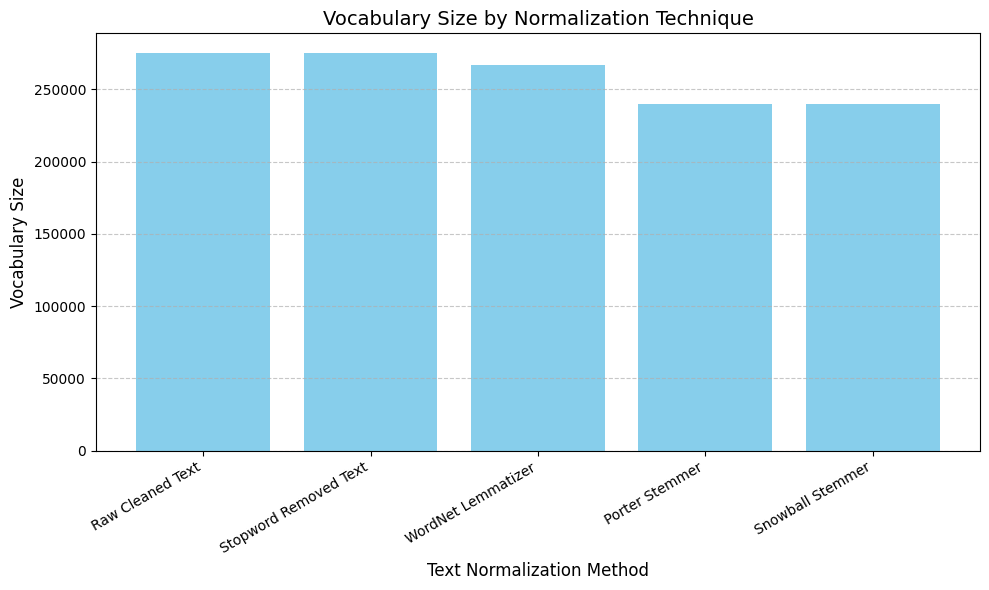

In [ ]:
import matplotlib.pyplot as plt

# Extract vocab sizes from results_df for consistency
vocab_plot_data = {row["Method"]: row["Vocab Size"] for _, row in results_df.iterrows()}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(vocab_plot_data.keys(), vocab_plot_data.values(), color='skyblue')
plt.title("Vocabulary Size by Normalization Technique", fontsize=14)
plt.xlabel("Text Normalization Method", fontsize=12)
plt.ylabel("Vocabulary Size", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
sample_text = df['clean_text'].iloc[0]
print("Original:", sample_text)
print("WordNet Lemmatizer:", " ".join(df['wordnet_lemmas'].iloc[0]))
print("Porter Stemmer:", " ".join(df['porter_stems'].iloc[0]))
print("Snowball Stemmer:", " ".join(df['snowball_stems'].iloc[0]))


Original: i received this product early from the seller they are a very tastey a great midday snack i have shared them with my glutten free friends they will be ordering this product more very soon
WordNet Lemmatizer: i received this product early from the seller they are a very tastey a great midday snack i have shared them with my glutten free friend they will be ordering this product more very soon
Porter Stemmer: i receiv thi product earli from the seller they are a veri tastey a great midday snack i have share them with my glutten free friend they will be order thi product more veri soon
Snowball Stemmer: i receiv this product earli from the seller they are a veri tastey a great midday snack i have share them with my glutten free friend they will be order this product more veri soon


This is a typical product review — informal, unpunctuated, and has some spelling errors (e.g., "tastey", "glutten"). It's a good example to analyze how well each method handles such real-world noisy data.

WordNet Lemmatizer:  Maintains real word forms and handles plural nouns

Porter Stemmer:Many tokens are truncated (received → receiv, early → earli, shared → share, ordering → order). Over-stemming: this → thi, very → veri, friends → friend. Keeps words readable but loses some natural grammar.

Snowball Stemmer:Shortens vocabulary but also slightly better at retaining structure than Porter.

### Analysis and insights

| Method                | Accuracy | Vocabulary Size | Time (s) |
|-----------------------|----------|------------------|----------|
| Raw Cleaned Text      | 0.7253   | 275,057          | 210.66   |
| Stopword Removed Text | 0.7214   | 274,919          | 196.52   |
| WordNet Lemmatizer    | 0.7251   | 266,828          | 313.69   |
| Porter Stemmer        | 0.7236   | 239,884          | 579.52   |
| Snowball Stemmer      | 0.7232   | 239,568          | 437.46   |


**WordNet Lemmatizer**: Achieved second-highest accuracy (72.51%), nearly identical to raw cleaned text. Retained a large vocabulary (266,828 words) — preserving word forms and semantic clarity. Balanced interpretability and performance, making it ideal for deep learning and transformer-based models.This aligns with expectations, as lemmatization preserves actual word forms, which benefits interpretability and compatibility with pre-trained models. It also had the lowest runtime (313.69s) among stemmers and lemmatizers, making it both effective and efficient in our setup.

Porter Stemmer has a smaller vocabulary and it over-stems. It loses grammtical clarity.

Snowball Stemmer is not suitable for BERT as BERT was trained on huge corpora like Wikipedia which contain normal, grammatical, full words and not stems.

**Porter Stemmer and Snowball Stemmer** produced slightly lower accuracies (72.36% and 72.32%, respectively), while reducing the vocabulary size by around 10–11%. The reduction stems from aggressive truncation of word forms, but this sometimes leads to over-stemming (e.g., “better” → “bett”), which can negatively impact understanding in classification tasks.

**Stopword Removal** <br>
Removing stopwords slightly reduced accuracy compared to raw text.
Indicates that some stopwords (like “not”, “very”) may still carry important sentiment information in reviews.

Out of stemmers and lemmatizers, WordNet Lemmatizer is chosen for due to the following reasons:

* **Highest Accuracy:**
Although the difference is slight, WordNet Lemmatizer outperforms both stemmers. When aiming for optimal classification accuracy, even a +0.1% gain matters in large datasets.

* **Context-Aware Normalization:**
Unlike stemmers, lemmatization uses linguistic rules and dictionaries. This results in more accurate base forms, essential for LSTM and especially pre-trained models like BERT, which rely on real vocabulary.

* Lemmatization keeps words semantically interpretable which helps preserve meaning and is better suited for models that learn from context (like LSTMs or attention in Transformers).

* **Balanced Vocabulary Size:**
Although it results in a larger vocabulary than stemming, this is a good thing when working with models that benefit from richer word diversity
<br>

Lemmatization retains by mapping words to their valid dictionary form. In contrast, stemming may strip words into non-standard which can degrade understanding in sequence models. Additionally, lemmatization provides better compatibility with pretrained word embeddings (like GloVe or Word2Vec), and improves model interpretability.
Therefore, due to its better preservation of linguistic meaning, improved alignment with deep learning models like LSTM and transformers, we will choose WordNet Lemmatizer as our primary normalization method.

In [ ]:
# Keep only the required columns
df = df[['Score', 'clean_text','clean_text_nltk','wordnet_lemmas']]

df

,Score,clean_text,clean_text_nltk,wordnet_lemmas
0,5,i received this product early from the seller ...,received product early seller tastey great mid...,"[i, received, this, product, early, from, the,..."
1,5,numis collection assortment melange includes5 ...,numis collection assortment melange includes5 ...,"[numis, collection, assortment, melange, inclu..."
2,5,i was very careful not to overcook this pasta ...,careful overcook pasta making sure take bite e...,"[i, wa, very, careful, not, to, overcook, this..."
3,5,buying this multipack i was misled by the pict...,buying multipack misled picture whole hazel nu...,"[buying, this, multipack, i, wa, misled, by, t..."
4,5,these bars are so good i loved them warmed up ...,bars good loved warmed definitely think great ...,"[these, bar, are, so, good, i, loved, them, wa..."
...,...,...,...,...
309126,5,my current favorite tea i had basically given ...,current favorite tea basically given lipton te...,"[my, current, favorite, tea, i, had, basically..."
309127,5,growing up in the southwest refried beans were...,growing southwest refried beans staple home an...,"[growing, up, in, the, southwest, refried, bea..."
309128,3,like a lot of the gums by lotte the flavor doe...,like lot gums lotte flavor last long used one ...,"[like, a, lot, of, the, gum, by, lotte, the, f..."
309129,5,i trust this brandthe flavors are blended just...,trust brandthe flavors blended right love many...,"[i, trust, this, brandthe, flavor, are, blende..."


In [ ]:
# #  df = pd.read_csv("/content/processed_data.csv", on_bad_lines='skip')
# # Keep only the necessary columns
df.to_csv("/content/processed_data.csv", index=False)

### Conclusion: Best Normalization Approach for Our Dataset

After thoroughly experimenting with five popular normalization methods — clean text with no stopword removal, clean text with stopword removal, **WordNet Lemmatization**, **Porter Stemming**, and **Snowball Stemming** — we compared their **accuracy**, **vocabulary size**, and **processing time** on a sample classification task using logistic regression and TF-IDF features.

####  Key Observations:

- **WordNet Lemmatizer** gave the **highest accuracy among lemmatizer and stemmers** (72.51%) after clean text with no stopword removal and largest vocabulary, making it most suitable for deep learning models that rely on semantic richness.
- **Stemming methods** (Porter and Snowball) performed slightly worse in accuracy but had **smaller vocabulary sizes**, which can benefit lightweight models or environments with limited memory.
- **WordNet Lemmatization**'s trade-off in performance is justified given its interpretability and compatibility with models like **LSTM** and **BERT**.

####  Final Decision:
We will proceed with **WordNet Lemmatization** as the primary normalization method for training our models in part 4 and part 5 such as **LSTM and Transformer-based models**. Its contextual understanding and dictionary-based reductions preserve more semantic meaning, which is crucial for advanced NLP tasks.



## Test dataset preprocessing


In [ ]:
# Read all lines without dropping any rows
with open('/content/drive/MyDrive/Colab Notebooks/CW2/test.csv', 'r', encoding='utf-8', errors='replace') as f:
    reader = csv.reader(f)
    all_rows = list(reader)

# Create DataFrame from rows
df_test = pd.DataFrame(all_rows[1:], columns=all_rows[0])
print(f" Loaded test.csv with {len(df_test)} rows (excluding header).")

 Loaded test.csv with 119662 rows (excluding header).


In [ ]:
# Suppress specific BeautifulSoup warning
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
duplicate_rows = df_test[df_test.duplicated()]
df_test['clean_text'] = df_test['Text'].apply(clean_text)

In [ ]:
# Check total number of emojis in the dataset
total_emojis = count_total_emojis(df_test, 'clean_text')
print("Total number of emojis in the dataset:", total_emojis)

Total number of emojis in the dataset: 0


In [ ]:
# NLTK Tokenization
df_test['nltk_tokens'] = df_test['clean_text'].apply(nltk_tokenizer)
# Apply stopword removal
df_test['clean_text_nltk'] = df_test['clean_text'].apply(lambda x: " ".join(remove_stopwords_nltk(x.split())))
# Apply
df_test['wordnet_lemmas'] = df_test['nltk_tokens'].apply(wordnet_lemma)


In [ ]:
# Keep only the required columns
df_test = df_test[['Id','Text', 'clean_text','clean_text_nltk','wordnet_lemmas']]


The final processed test data is saved to a csv file. The following normalized columns were kept for further processes.
clean_text: Used as the baseline preprocessed version (lowercased, punctuations removed) for comparison across stages.

clean_text_nltk: Represents tokenized and normalized text with stopword removal for input into traditional NLP pipelines.

wordnet_lemmas: Kept as the final, lemmatized version optimized for downstream modeling and topic analysis.

In [ ]:
df_test.to_csv("/content/processed_test_data.csv", index=False)

# 3. Vector Space Model and Feature Representation

Different text representation techniques were analysed, including Bag-of-Words(BoW), TF-IDF, and n-gram features(unigrams, bigrams and trigrams). Different n-gram sizes were evaluated by considering how they impacted the performance of a simple model, with results and insights stated at the end of the section.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW2/train.csv')

In [ ]:
# Splitting labels (80-20) so that they can be used for model representation as well
y = df["Score"]
X_train_text, X_test_text, y_train, y_test = train_test_split(df["Text"], y, test_size=0.2, random_state=42, stratify=y)

## Bag of Words (BOW) Representation

### Binary Representation

In [ ]:
binary_vectorizer = CountVectorizer(binary=True)
X_train_binary = binary_vectorizer.fit_transform(X_train_text)
X_test_binary = binary_vectorizer.transform(X_test_text)

print(f"Count (Binary) BoW Shape: {X_train_binary.shape}")  # (num_samples, num_features)

Count (Binary) BoW Shape: (247304, 95057)


### CountVectorizer (unigram, bigram, trigram) Representation

In [ ]:
print("Shapes of different feature representations")
print("(num_samples, num_features):\n")

# Unigram Feature Representation
unigram_vectorizer = CountVectorizer(ngram_range=(1,1))
X_train_unigram = unigram_vectorizer.fit_transform(X_train_text)
X_test_unigram = unigram_vectorizer.transform(X_test_text)

# print("\nUnigram Example:\n", unigram_vectorizer.get_feature_names_out()[:10])  # Display first 10 unigram features
print(f"Count (Unigram) BoW Shape: {X_train_unigram.shape}")
print("*"*50)

# Bigram Feature Representation
bigram_vectorizer = CountVectorizer(ngram_range=(2,2))
X_train_bigram = bigram_vectorizer.fit_transform(X_train_text)
X_test_bigram = bigram_vectorizer.transform(X_test_text)

# print("\nBigram Example:\n", bigram_vectorizer.get_feature_names_out()[:10])  # Display first 10 bigram features
print(f"Count (Bigram) BoW Shape: {X_train_bigram.shape}")
print("*"*50)

# Trigram Feature Representation
trigram_vectorizer = CountVectorizer(ngram_range=(3,3))
X_train_trigram = trigram_vectorizer.fit_transform(X_train_text)
X_test_trigram = trigram_vectorizer.transform(X_test_text)

# print("\nTrigram Example:\n", trigram_vectorizer.get_feature_names_out()[:10])  # Display first 10 trigram features
print(f"Count (Trigram) BoW Shape: {X_train_trigram.shape}")
print("*"*50)

print(f"\nFeature Dimensions:\nUnigram: {X_train_unigram.shape[1]}, Bigram: {X_train_bigram.shape[1]}, Trigram: {X_train_trigram.shape[1]}")



Shapes of different feature representations
(num_samples, num_features):

Count (Unigram) BoW Shape: (247304, 95057)
**************************************************
Count (Bigram) BoW Shape: (247304, 2207651)
**************************************************
Count (Trigram) BoW Shape: (247304, 8169848)
**************************************************

Feature Dimensions:
Unigram: 95057, Bigram: 2207651, Trigram: 8169848


It is noted that there is a large exponential growth from unigrams to bigrams. Trigram features were the highest as expected but this may give better context and clarity to phrases as there is a lot of possible unique sequences.

### Vector space representations

In [ ]:
# TF-IDF Representation (Term Frequency - Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)

# TF-IDF - Unigram - No stop word removal
print("TF-IDF - Unigram - No stop word removal")
tfidf_unigram_stop_vectorizer = TfidfVectorizer()
X_tfidf_stop_unigram = tfidf_unigram_stop_vectorizer.fit_transform(X_train_text)
X_tfidf_stop_unigram_test = tfidf_unigram_stop_vectorizer.transform(X_test_text)
# print(X_tfidf_stop_unigram)
print("Features:",X_tfidf_stop_unigram.shape[1])
print("*"*50)

# TF-IDF - Unigram
print("TF-IDF - Unigram")
tfidf_unigram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
X_tfidf_unigram = tfidf_unigram_vectorizer.fit_transform(X_train_text)
X_tfidf_unigram_test = tfidf_unigram_vectorizer.transform(X_test_text)
# print(X_tfidf_unigram)
print("Features:",X_tfidf_unigram.shape[1])
print("*"*50)

# TF-IDF - Bigram
print("TF-IDF - Bigram")
tfidf_bigram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))
X_tfidf_bigram = tfidf_bigram_vectorizer.fit_transform(X_train_text)
X_tfidf_bigram_test = tfidf_bigram_vectorizer.transform(X_test_text)
# print(X_tfidf_bigram)
print("Features:",X_tfidf_bigram.shape[1])
print("*"*50)


# TF-IDF - Trigram
print("TF-IDF - Trigram")
tfidf_trigram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(3, 3))
X_tfidf_trigram = tfidf_trigram_vectorizer.fit_transform(X_train_text)
X_tfidf_trigram_test = tfidf_trigram_vectorizer.transform(X_test_text)
# print(X_tfidf_trigram)
print("Features:",X_tfidf_trigram.shape[1])
print("*"*50)


# TF-IDF - Unigram + Bigram
print("TF-IDF - Unigram + Bigram")
tfidf_ubgram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_tfidf_ubgram = tfidf_ubgram_vectorizer.fit_transform(X_train_text)
X_tfidf_ubgram_test = tfidf_ubgram_vectorizer.transform(X_test_text)
# print(X_tfidf_ubgram)
print("Features:",X_tfidf_ubgram.shape[1])
print("*"*50)


# TF-IDF - Bigram + Trigram
print("TF-IDF - Bigram + Trigram")
tfidf_btgram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 3))
X_tfidf_btgram = tfidf_btgram_vectorizer.fit_transform(X_train_text)
X_tfidf_btgram_test = tfidf_btgram_vectorizer.transform(X_test_text)
# print(X_tfidf_btgram)
print("Features:",X_tfidf_btgram.shape[1])
print("*"*50)


# TF-IDF - Unigram + Bigram + Trigram
print("TF-IDF - Unigram + Bigram + Trigram")
tfidf_ubtgram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
X_tfidf_ubtgram = tfidf_ubtgram_vectorizer.fit_transform(X_train_text)
X_tfidf_ubtgram_test = tfidf_ubtgram_vectorizer.transform(X_test_text)
# print(X_tfidf_ubtgram)
print("Features:",X_tfidf_ubtgram.shape[1])
print("*"*50)

TF-IDF - Unigram - No stop word removal
Features: 95057
**************************************************
TF-IDF - Unigram
Features: 94744
**************************************************
TF-IDF - Bigram
Features: 2938191
**************************************************
TF-IDF - Trigram
Features: 7018506
**************************************************
TF-IDF - Unigram + Bigram
Features: 3032935
**************************************************
TF-IDF - Bigram + Trigram
Features: 9956697
**************************************************
TF-IDF - Unigram + Bigram + Trigram
Features: 10051441
**************************************************


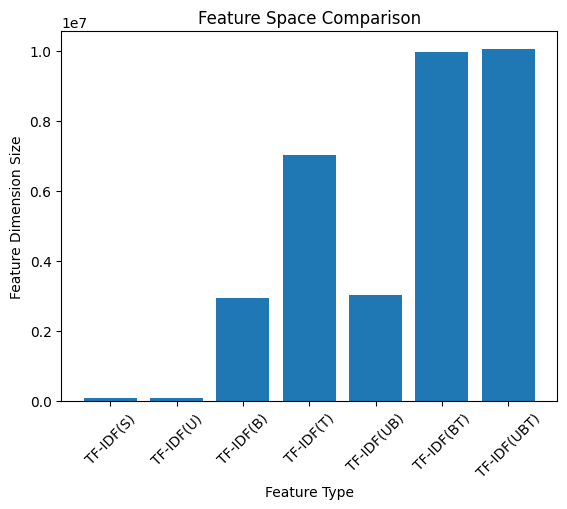

In [ ]:
ngram_sizes = {
    # "Unigram": X_train_unigram.shape[1],
    # "Bigram": X_train_bigram.shape[1],
    # "Trigram": X_train_trigram.shape[1],
    # "Binary": X_train_binary.shape[1],
    "TF-IDF(S)": X_tfidf_stop_unigram.shape[1],
    "TF-IDF(U)": X_tfidf_unigram.shape[1],
    "TF-IDF(B)": X_tfidf_bigram.shape[1],
    "TF-IDF(T)": X_tfidf_trigram.shape[1],
    "TF-IDF(UB)": X_tfidf_ubgram.shape[1],
    "TF-IDF(BT)": X_tfidf_btgram.shape[1],
    "TF-IDF(UBT)": X_tfidf_ubtgram.shape[1]
}

plt.bar(ngram_sizes.keys(), ngram_sizes.values())
plt.xlabel("Feature Type")
plt.ylabel("Feature Dimension Size")
plt.title("Feature Space Comparison")
plt.xticks(rotation=45)
plt.show()

Trigram representations has the largest representation as they give more contextual information to the text. Comparing to trigrams, unigrams are exponentially small.

## Word Embeddings


Three types of word embedding models were tried and tested on the dataset:</br>
Word2Vec Model </br>
Pretrained GloVe Vectors </br>
FastText Model </br>

### Processing Data for word embeddings

In [ ]:
# Generating a list of tokens for each record
def get_tokens(sentence):
    return [x.text for x in nlp_en(sentence)]

In [ ]:
df["tokens"] = df["Text"].astype('str').progress_apply(get_tokens)

In [ ]:
df.to_pickle("df_tokenized.pickle")

In [ ]:
df = pd.read_pickle("df_tokenized.pickle")

In [ ]:
# Function to generate document embeddings for each model used below
def get_document_embedding(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

### Training word embeddings using Word2Vec with CBOW and Skip-gram models

In [ ]:
# CBOW Model
model_w2v_cbow = gensim.models.Word2Vec(df["tokens"].tolist(), min_count=5, window = 9, vector_size = 100)
# Skipgram Model
model_w2v_sg = gensim.models.Word2Vec(df["tokens"].tolist(), min_count=5, window = 9, vector_size = 100, sg=1)

In [ ]:
# Generate and store Word2Vec CBOW embeddings
df["w2v_cbow_embedding"] = df["tokens"].apply(lambda tokens: get_document_embedding(tokens, model_w2v_cbow))

# Generate and store Word2Vec Skip-gram embeddings
df["w2v_sg_embedding"] = df["tokens"].apply(lambda tokens: get_document_embedding(tokens, model_w2v_sg))

In [ ]:
# Save models
model_w2v_cbow.save("model_w2v_cbow.model")
model_w2v_sg.save("model_w2v_sg.model")

In [ ]:
# Reload model
model_w2v_cbow = gensim.models.Word2Vec.load("model_w2v_cbow.model")
model_w2v_sg = gensim.models.Word2Vec.load("model_w2v_sg.model")

In [ ]:
# Converting list of vectors into numpy arrays
X_w2v_cbow = np.vstack(df["w2v_cbow_embedding"])
X_w2v_sg = np.vstack(df["w2v_sg_embedding"])

X_train_w2v_cbow, X_test_w2v_cbow, y_train, y_test = train_test_split(X_w2v_cbow, y, test_size=0.2, random_state=42, stratify=y)
X_train_w2v_sg, X_test_w2v_sg, _, _ = train_test_split(X_w2v_sg, y, test_size=0.2, random_state=42, stratify=y)

### Training word embeddings using FastText with CBOW and Skip-gram models

In [ ]:
# CBOW Model
model_ft_cbow = gensim.models.FastText(df["tokens"].tolist(), min_count=5, window = 9, vector_size = 100)
# Skipgram Model
model_ft_sg = gensim.models.FastText(df["tokens"].tolist(), min_count=5, window = 9, vector_size = 100, sg=1)


In [ ]:
# Generate and store FastText CBOW embeddings
df["ft_cbow_embedding"] = df["tokens"].apply(lambda tokens: get_document_embedding(tokens, model_ft_cbow))

# Generate and store FastText Skip-gram embeddings
df["ft_sg_embedding"] = df["tokens"].apply(lambda tokens: get_document_embedding(tokens, model_ft_sg))

In [ ]:
# Save models
model_ft_cbow.save("model_ft_cbow.model")
model_ft_sg.save("model_ft_sg.model")

In [ ]:
# Reload model
model_ft_cbow = gensim.models.Word2Vec.load("model_ft_cbow.model")
model_ft_sg = gensim.models.Word2Vec.load("model_ft_sg.model")

In [ ]:
# Converting list of vectors into numpy arrays
X_ft_cbow = np.vstack(df["ft_cbow_embedding"])
X_ft_sg = np.vstack(df["ft_sg_embedding"])

X_train_ft_cbow, X_test_ft_cbow, y_train, y_test = train_test_split(X_ft_cbow, y, test_size=0.2, random_state=42, stratify=y)
X_train_ft_sg, X_test_ft_sg, _, _ = train_test_split(X_ft_sg, y, test_size=0.2, random_state=42, stratify=y)

### Training word embeddings using GloVe

In [ ]:
# Load GloVe 50d embeddings
glove_model_load = api.load("glove-wiki-gigaword-50")

# Converting a sentence into its GloVe representation
def get_glove_embedding(tokens):
    # words = text.split()
    vectors = [glove_model_load[word] for word in tokens if word in glove_model_load]
    return np.mean(vectors, axis=0) if vectors else np.zeros(50)

glove_model = [get_glove_embedding(tokens) for tokens in df["tokens"]]

df["glove_embedding"] = df["tokens"].apply(get_glove_embedding)

In [ ]:
# Converting list of vectors into numpy arrays
X_glove = np.vstack(df["glove_embedding"])
X_train_glove, X_test_glove, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42, stratify=y)

## Comparing the Effects of Different Feature Representations - Logistic Regression

In [ ]:
# Splitting labels (80-20)
y = df["Score"]
X_train_text, X_test_text, y_train, y_test = train_test_split(df["Text"], y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define all feature sets in a dictionary
feature_sets = {
    "BoW Binary": [X_train_binary,X_test_binary],
    "BoW Unigram": [X_train_unigram,X_test_unigram],
    "BoW Bigram": [X_train_bigram,X_test_bigram],
    "BoW Trigram": [X_train_trigram,X_test_trigram],
    "TF-IDF (No Stopword Removal) Unigram": [X_tfidf_stop_unigram,X_tfidf_stop_unigram_test],
    "TF-IDF Unigram": [X_tfidf_unigram,X_tfidf_unigram_test],
    "TF-IDF Bigram": [X_tfidf_bigram,X_tfidf_bigram_test],
    "TF-IDF Trigram": [X_tfidf_trigram,X_tfidf_trigram_test],
    "TF-IDF Unigram + Bigram": [X_tfidf_ubgram,X_tfidf_ubgram_test],
    "TF-IDF Bigram + Trigram": [X_tfidf_btgram,X_tfidf_btgram_test],
    "TF-IDF Unigram + Bigram + Trigram": [X_tfidf_ubtgram,X_tfidf_ubtgram_test],
    "Word2Vec CBOW": [X_train_w2v_cbow, X_test_w2v_cbow],
    "Word2Vec Skip-Gram": [X_train_w2v_sg, X_test_w2v_sg],
    "FastText CBOW": [X_train_ft_cbow,X_test_ft_cbow],
    "FastText Skip-Gram": [X_train_ft_sg,X_test_ft_sg],
    "GloVe": [X_train_glove,X_test_glove]
}

In [ ]:
results = {}

# Training and evaluating a Logistic Regression model on each representation
for name, (X_train, X_test) in feature_sets.items():
    print(f"Training Logistic Regression on {name}...")

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1-score": f1}

results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="Accuracy", ascending=False))

Training Logistic Regression on BoW Binary...
Training Logistic Regression on BoW Unigram...
Training Logistic Regression on BoW Bigram...
Training Logistic Regression on BoW Trigram...
Training Logistic Regression on TF-IDF (No Stopword Removal) Unigram...
Training Logistic Regression on TF-IDF Unigram...
Training Logistic Regression on TF-IDF Bigram...
Training Logistic Regression on TF-IDF Trigram...
Training Logistic Regression on TF-IDF Unigram + Bigram...
Training Logistic Regression on TF-IDF Bigram + Trigram...
Training Logistic Regression on TF-IDF Unigram + Bigram + Trigram...
Training Logistic Regression on Word2Vec CBOW...
Training Logistic Regression on Word2Vec Skip-Gram...
Training Logistic Regression on FastText CBOW...
Training Logistic Regression on FastText Skip-Gram...
Training Logistic Regression on GloVe...
                                      Accuracy  Precision    Recall  F1-score
TF-IDF (No Stopword Removal) Unigram  0.688330   0.628678  0.688330  0.612152
BoW

#### Visualization and Insights

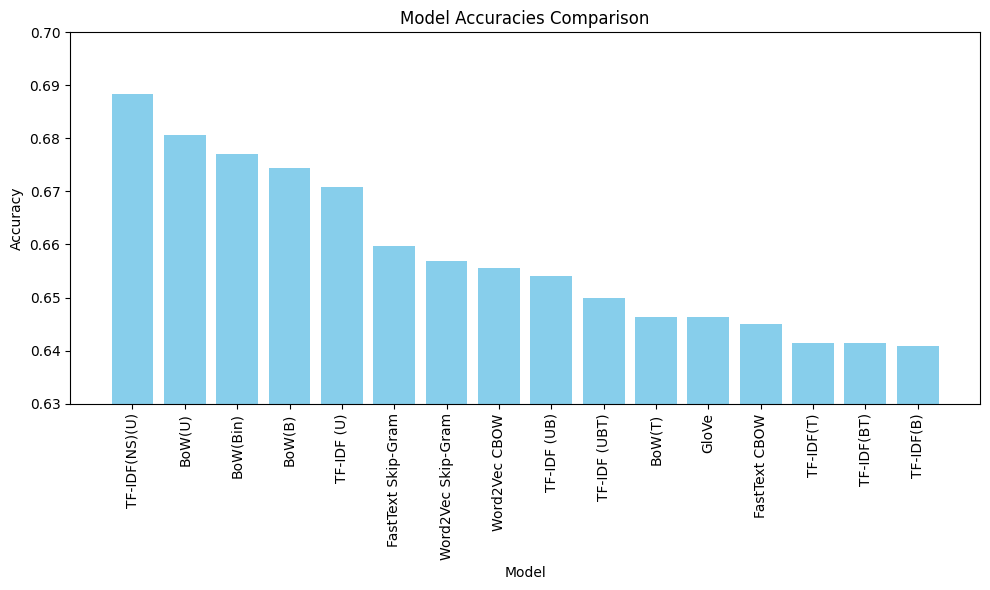

In [ ]:
# Models and their corresponding accuracies
models = [
    "TF-IDF(NS)(U)", "BoW(U)", "BoW(Bin)", "BoW(B)",
    "TF-IDF (U)", "FastText Skip-Gram", "Word2Vec Skip-Gram", "Word2Vec CBOW",
    "TF-IDF (UB)", "TF-IDF (UBT)", "BoW(T)",
    "GloVe", "FastText CBOW", "TF-IDF(T)", "TF-IDF(BT)", "TF-IDF(B)"
]

accuracies = [
    0.688330, 0.680643, 0.677149, 0.674354, 0.670860, 0.659679, 0.656883, 0.655486,
    0.654088, 0.649895, 0.646401, 0.646401, 0.645003, 0.641509, 0.641509, 0.640811
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')

plt.xticks(rotation=90, fontsize=10)
plt.ylim(0.63, 0.70)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.tight_layout()
plt.show()

After training the Logistic Regression models on various feature representations and embeddings, the results indicate that TF-IDF without stop word removal returned the best accuracy.</br>Unigram features provided better performance compared to bigrams and trigrams. BoW Unigrams had higher precision than TF-IDF Unigram, suggesting that it is better in predicting positive cases. Among the text embeddings, the Skip-gram model performed better than Continuous Bag-of-Words(CBOW). The GloVe model showed relatively poorer results compared to other word embeddings. However, the FastText model delivered the best performance overall.</br>
CountVectorizer representations outperformed TF-IDF. </br>Trigram features took significantly longer to process than unigrams and bigrams and were computationally expensive, which is expected, due to their much larger feature dimensions. However, this analysis is based on a specific model and may vary with different models and hyperparameters.











# 4. Model Training, Selection and Hyperparameter Tuning

Experimented with 5 models and optimized model parameters using cross validation.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CW2/processed_data (2).csv")

## Logistic Regression

### TfidfVectorizer

In [ ]:
# Function that runs the Logistic Regression model with the required text column using TF-IDF Vectorizer and unigram
def train_logistic_regression(df, text_column):
    print(f"\n=== Training with: {text_column} ===")

    X = df[text_column]
    y = df['Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


In [ ]:
train_logistic_regression(df, 'clean_text')


=== Training with: clean_text ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7255


In [ ]:
train_logistic_regression(df, 'wordnet_lemmas')


=== Training with: wordnet_lemmas ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7244


In [ ]:
train_logistic_regression(df, 'clean_text_nltk')


=== Training with: clean_text_nltk ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7200


In [ ]:
# Function that runs the Logistic Regression model with the required text column using TF-IDF Vectorizer and bigram
def train_logistic_regression_bigram(df, text_column):
    print(f"\n=== Training with: {text_column} ===")

    X = df[text_column]
    y = df['Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # TF-IDF vectorization with bigram
    vectorizer = TfidfVectorizer(ngram_range=(2, 2))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

# Function that runs the Logistic Regression model with the required text column using TF-IDF Vectorizer and trigram
def train_logistic_regression_trigram(df, text_column):
    print(f"\n=== Training with: {text_column} ===")

    X = df[text_column]
    y = df['Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # TF-IDF vectorization with trigram
    vectorizer = TfidfVectorizer(ngram_range=(3, 3))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


In [ ]:
print("TfIdf - Bigram")
train_logistic_regression_bigram(df, 'clean_text')

TfIdf - Bigram

=== Training with: clean_text ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7372


In [ ]:
print("TfIdf - Bigram")
train_logistic_regression_bigram(df, 'wordnet_lemmas')

TfIdf - Bigram

=== Training with: wordnet_lemmas ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7368


In [ ]:
print("TfIdf - Bigram")
train_logistic_regression_bigram(df, 'clean_text_nltk')

TfIdf - Bigram

=== Training with: clean_text_nltk ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6931


### Countvectorizer

In [ ]:
# Function that runs the Logistic Regression model with the required text column using Count Vectorizer and unigram
def train_logistic_regression_count(df, text_column):
    print(f"\n=== Training with: {text_column} ===")

    X = df[text_column]
    y = df['Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # Count vectorization
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

In [ ]:
train_logistic_regression_count(df, 'clean_text')


=== Training with: clean_text ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7120


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
train_logistic_regression_count(df, 'wordnet_lemmas')


=== Training with: wordnet_lemmas ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7108


In [ ]:
train_logistic_regression_count(df, 'clean_text_nltk')


=== Training with: clean_text_nltk ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7061


In [ ]:
# Function that runs the Logistic Regression model with the required text column using Count Vectorizer and bigram
def train_logistic_regression_count_bigram(df, text_column):
    print(f"\n=== Training with: {text_column} ===")

    X = df[text_column]
    y = df['Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # Count vectorization and bigram
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

# Function that runs the Logistic Regression model with the required text column using Count Vectorizer and trigram
def train_logistic_regression_count_trigram(df, text_column):
    print(f"\n=== Training with: {text_column} ===")

    X = df[text_column]
    y = df['Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # Count vectorization and trigram
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Logistic Regression model
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

In [ ]:
print("Count - Bigram")
train_logistic_regression_count_bigram(df, 'clean_text')

Count - Bigram

=== Training with: clean_text ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7243


In [ ]:
print("Count - Bigram")
train_logistic_regression_count_bigram(df, 'wordnet_lemmas')

Count - Bigram

=== Training with: wordnet_lemmas ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7227


In [ ]:
print("Count - Bigram")
train_logistic_regression_count_bigram(df, 'clean_text_nltk')

Count - Bigram

=== Training with: clean_text_nltk ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7024


### Word Embeddings - FastText

In [ ]:
# Function to get the FastText embeddings
def get_fasttext_embeddings(df, text_column):
    print(f"Training FastText model on: {text_column}")

    # Tokenize text for FastText
    tokenized_text = [text.split() for text in df[text_column]]

    # Train FastText model using skipgram
    ft_model = FastText(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4, sg=1)

    # Get average embedding for each document
    def embed_text(text_tokens):
        vectors = [ft_model.wv[word] for word in text_tokens if word in ft_model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(ft_model.vector_size)

    embeddings = np.array([embed_text(tokens) for tokens in tokenized_text])
    return embeddings

# Function to run the logistic regression model with fastText
def run_logistic_with_fasttext(df, text_column):
    print(f"\n=== Logistic Regression with FastText embeddings on '{text_column}' ===")

    embeddings = get_fasttext_embeddings(df, text_column)
    y = df['Score']

    X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.1, random_state=42, stratify=y)

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

In [ ]:
run_logistic_with_fasttext(df, 'clean_text')


=== Logistic Regression with FastText embeddings on 'clean_text' ===
Training FastText model on: clean_text


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6975


In [ ]:
run_logistic_with_fasttext(df, 'wordnet_lemmas')


=== Logistic Regression with FastText embeddings on 'wordnet_lemmas' ===
Training FastText model on: wordnet_lemmas


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6956


In [ ]:
run_logistic_with_fasttext(df, 'clean_text_nltk')


=== Logistic Regression with FastText embeddings on 'clean_text_nltk' ===
Training FastText model on: clean_text_nltk


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7031


### Hyperparameter tuning

In [ ]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__class_weight': [None, 'balanced']
}

In [ ]:
# Pipeline function for hyperparameter tuning
def train_logistic_regression_ngram(df, text_column, ngram_range):
    print(f"\n=== Training with: {text_column}, ngram_range={ngram_range} ===")

    X = df[text_column]
    y = df['Score']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # Pipeline with TF-IDF and Logistic Regression
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(ngram_range=ngram_range)),
        ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
    ])

    # Grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model prediction
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# Tuning the best baseline combination
print("TfIdf - Bigram")
train_logistic_regression_ngram(df, 'clean_text', ngram_range=(2, 2))

TfIdf - Bigram

=== Training with: clean_text, ngram_range=(2, 2) ===
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Params: {'classifier__C': 10, 'classifier__class_weight': None}
Accuracy: 0.7375


#### Tf-IDF Fasttext

Trying to improve the model with best hyperparameters and combining FastText word embeddings

In [ ]:
# Loading trained FastText model
fasttext_model = FastText.load("/content/drive/MyDrive/Colab Notebooks/CW2/my_fasttext.model")

In [ ]:
# Function to get the fastText vectors
def get_fasttext_vector(text, model, vector_size=100):
    words = text.split()
    vectors = [model.wv[w] for w in words if w in model.wv]
    if not vectors:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

# Function to stack the tfidf vectorizer and fasttext embedding
def prepare_combined_features(X_text, tfidf_vectorizer, ft_model, ft_vector_size=100):
    X_tfidf = tfidf_vectorizer.transform(X_text)
    X_fasttext = np.vstack([get_fasttext_vector(text, ft_model, ft_vector_size) for text in X_text])
    X_combined = hstack([X_tfidf, X_fasttext])
    return X_combined

# Main Function to run the model configuration on the text column
def train_eval_with_validation(df, text_column='Text', target_column='Score'):
    print("Combining TF-IDF bigrams + FastText vectors")

    X = df[text_column]
    y = df[target_column]
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, stratify=y_temp, random_state=42)

    # TF-IDF with bigrams (best)
    tfidf = TfidfVectorizer(ngram_range=(2, 2))
    tfidf.fit(X_train)

    # Preparing the features using the model
    X_train_combined = prepare_combined_features(X_train, tfidf, fasttext_model, fasttext_model.vector_size)
    X_val_combined = prepare_combined_features(X_val, tfidf, fasttext_model, fasttext_model.vector_size)
    X_test_combined = prepare_combined_features(X_test, tfidf, fasttext_model, fasttext_model.vector_size)

    # Training classifier
    clf = LogisticRegression(C=10, class_weight=None, max_iter=1000, solver='lbfgs', multi_class='multinomial')
    clf.fit(X_train_combined, y_train)

    print("\nValidation Results:")
    val_preds = clf.predict(X_val_combined)
    print(classification_report(y_val, val_preds))

    print("\nTest Results:")
    test_preds = clf.predict(X_test_combined)
    print(classification_report(y_test, test_preds))
    print(f"Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")


In [ ]:
print("TfIdf - FastText - Bigram")
train_eval_with_validation(df, 'clean_text')

TfIdf - FastText - Bigram
Combining TF-IDF bigrams + FastText vectors


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Validation Results:
              precision    recall  f1-score   support

           1       0.66      0.69      0.68      2838
           2       0.38      0.21      0.27      1626
           3       0.43      0.32      0.36      2325
           4       0.44      0.29      0.35      4379
           5       0.82      0.93      0.87     19660

    accuracy                           0.74     30828
   macro avg       0.55      0.49      0.51     30828
weighted avg       0.70      0.74      0.71     30828


Test Results:
              precision    recall  f1-score   support

           1       0.65      0.67      0.66      2839
           2       0.36      0.21      0.26      1626
           3       0.46      0.35      0.40      2325
           4       0.46      0.30      0.36      4379
           5       0.83      0.94      0.88     19662

    accuracy                           0.74     30831
   macro avg       0.55      0.49      0.51     30831
weighted avg       0.70      0.74      0.

### Best Model

**Best Model and Results:**
</br>
The best configuration was the model build on CountVectorizer with bigrams with C=10 and ‘class_weight’ = None and stacked with FastText features, leading to a final accuracy of 73.93%.


## Naive Bayes

### Baseline Naive Bayes

In [ ]:
text_columns = ['clean_text', 'wordnet_lemmas', 'clean_text_nltk']
target_column = 'Score'

In [ ]:
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("TfIdf Vectorizer")

    # Drop rows with missing values in current text column or target
    # df_clean = df[[col, target_column]].dropna()

    X = df[col]
    y = df[target_column]

    # Stratified 90-10 split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Naive Bayes classifier
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
TfIdf Vectorizer
Accuracy: 0.6379
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0018    0.0035      2839
           2     0.0000    0.0000    0.0000      1626
           3     0.0000    0.0000    0.0000      2325
           4     0.0000    0.0000    0.0000      4379
           5     0.6378    0.9999    0.7789     19662

    accuracy                         0.6379     30831
   macro avg     0.3276    0.2003    0.1565     30831
weighted avg     0.4988    0.6379    0.4970     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
TfIdf Vectorizer


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6378
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0014    0.0028      2839
           2     0.0000    0.0000    0.0000      1626
           3     0.0000    0.0000    0.0000      2325
           4     0.0000    0.0000    0.0000      4379
           5     0.6378    0.9999    0.7788     19662

    accuracy                         0.6378     30831
   macro avg     0.3276    0.2003    0.1563     30831
weighted avg     0.4988    0.6378    0.4970     30831


--- Evaluating model with feature column: 'clean_text_nltk' ---
TfIdf Vectorizer


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6380
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0028    0.0056      2839
           2     0.0000    0.0000    0.0000      1626
           3     0.0000    0.0000    0.0000      2325
           4     0.0000    0.0000    0.0000      4379
           5     0.6379    1.0000    0.7789     19662

    accuracy                         0.6380     30831
   macro avg     0.3276    0.2006    0.1569     30831
weighted avg     0.4989    0.6380    0.4973     30831



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("TfIdf Vectorizer")

    # Drop rows with missing values in current text column or target
    # df_clean = df[[col, target_column]].dropna()

    X = df[col]
    y = df[target_column]

    # Stratified 90-10 split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(ngram_range=(2,2))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Naive Bayes classifier
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
TfIdf Vectorizer
Accuracy: 0.6378
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0004    0.0007      2839
           2     0.0000    0.0000    0.0000      1626
           3     0.0000    0.0000    0.0000      2325
           4     0.0000    0.0000    0.0000      4379
           5     0.6378    1.0000    0.7788     19662

    accuracy                         0.6378     30831
   macro avg     0.3276    0.2001    0.1559     30831
weighted avg     0.4988    0.6378    0.4967     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
TfIdf Vectorizer


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6378
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0004    0.0007      2839
           2     0.0000    0.0000    0.0000      1626
           3     0.0000    0.0000    0.0000      2325
           4     0.0000    0.0000    0.0000      4379
           5     0.6378    1.0000    0.7788     19662

    accuracy                         0.6378     30831
   macro avg     0.3276    0.2001    0.1559     30831
weighted avg     0.4988    0.6378    0.4967     30831


--- Evaluating model with feature column: 'clean_text_nltk' ---
TfIdf Vectorizer


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6380
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0025    0.0049      2839
           2     0.0000    0.0000    0.0000      1626
           3     0.0000    0.0000    0.0000      2325
           4     1.0000    0.0005    0.0009      4379
           5     0.6379    1.0000    0.7789     19662

    accuracy                         0.6380     30831
   macro avg     0.5276    0.2006    0.1570     30831
weighted avg     0.6409    0.6380    0.4973     30831



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("TfIdf Vectorizer")

    # Drop rows with missing values in current text column or target
    # df_clean = df[[col, target_column]].dropna()

    X = df[col]
    y = df[target_column]

    # Stratified 90-10 split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(ngram_range=(3,3))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Naive Bayes classifier
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
TfIdf Vectorizer
Accuracy: 0.6382
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0035    0.0070      2839
           2     0.0000    0.0000    0.0000      1626
           3     0.0000    0.0000    0.0000      2325
           4     1.0000    0.0007    0.0014      4379
           5     0.6380    1.0000    0.7790     19662

    accuracy                         0.6382     30831
   macro avg     0.5276    0.2008    0.1575     30831
weighted avg     0.6410    0.6382    0.4976     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
TfIdf Vectorizer


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6381
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0035    0.0070      2839
           2     0.0000    0.0000    0.0000      1626
           3     0.0000    0.0000    0.0000      2325
           4     1.0000    0.0005    0.0009      4379
           5     0.6380    1.0000    0.7790     19662

    accuracy                         0.6381     30831
   macro avg     0.5276    0.2008    0.1574     30831
weighted avg     0.6410    0.6381    0.4976     30831


--- Evaluating model with feature column: 'clean_text_nltk' ---
TfIdf Vectorizer


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6386
Classification Report:
              precision    recall  f1-score   support

           1     1.0000    0.0035    0.0070      2839
           2     0.0000    0.0000    0.0000      1626
           3     1.0000    0.0017    0.0034      2325
           4     0.8095    0.0039    0.0077      4379
           5     0.6384    0.9998    0.7792     19662

    accuracy                         0.6386     30831
   macro avg     0.6896    0.2018    0.1595     30831
weighted avg     0.6896    0.6386    0.4989     30831



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("Count Vectorizer")

    # Drop rows with missing values in current text column or target
    # df_clean = df[[col, target_column]].dropna()

    X = df[col]
    y = df[target_column]

    # Stratified 90-10 split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # TF-IDF Vectorization
    vectorizer = CountVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Naive Bayes classifier
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
Count Vectorizer
Accuracy: 0.6936
Classification Report:
              precision    recall  f1-score   support

           1     0.6031    0.5315    0.5651      2839
           2     0.3778    0.0105    0.0203      1626
           3     0.3514    0.0839    0.1354      2325
           4     0.3583    0.2443    0.2906      4379
           5     0.7514    0.9456    0.8374     19662

    accuracy                         0.6936     30831
   macro avg     0.4884    0.3632    0.3698     30831
weighted avg     0.6321    0.6936    0.6386     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
Count Vectorizer
Accuracy: 0.6935
Classification Report:
              precision    recall  f1-score   support

           1     0.6033    0.5277    0.5629      2839
           2     0.4545    0.0123    0.0240      1626
           3     0.3583    0.0843    0.1365      2325
           4     0.3610    0.2425    0.2901      4379
  

In [ ]:
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("Count Vectorizer")

    # Drop rows with missing values in current text column or target
    # df_clean = df[[col, target_column]].dropna()

    X = df[col]
    y = df[target_column]

    # Stratified 90-10 split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # TF-IDF Vectorization
    vectorizer = CountVectorizer(ngram_range=(2,2))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Naive Bayes classifier
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
Count Vectorizer
Accuracy: 0.6665
Classification Report:
              precision    recall  f1-score   support

           1     0.7683    0.2325    0.3569      2839
           2     0.5000    0.0031    0.0061      1626
           3     0.5652    0.0224    0.0430      2325
           4     0.3938    0.0580    0.1011      4379
           5     0.6699    0.9957    0.8009     19662

    accuracy                         0.6665     30831
   macro avg     0.5795    0.2623    0.2616     30831
weighted avg     0.6229    0.6665    0.5616     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
Count Vectorizer
Accuracy: 0.6673
Classification Report:
              precision    recall  f1-score   support

           1     0.7541    0.2420    0.3664      2839
           2     0.4444    0.0025    0.0049      1626
           3     0.5484    0.0219    0.0422      2325
           4     0.3845    0.0612    0.1056      4379
  

In [ ]:
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("Count Vectorizer")

    # Drop rows with missing values in current text column or target
    # df_clean = df[[col, target_column]].dropna()

    X = df[col]
    y = df[target_column]

    # Stratified 90-10 split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    # TF-IDF Vectorization
    vectorizer = CountVectorizer(ngram_range=(3,3))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Naive Bayes classifier
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
Count Vectorizer
Accuracy: 0.6662
Classification Report:
              precision    recall  f1-score   support

           1     0.7559    0.2258    0.3477      2839
           2     0.4750    0.0117    0.0228      1626
           3     0.5424    0.0413    0.0767      2325
           4     0.4215    0.0466    0.0839      4379
           5     0.6687    0.9958    0.8001     19662

    accuracy                         0.6662     30831
   macro avg     0.5727    0.2642    0.2663     30831
weighted avg     0.6219    0.6662    0.5612     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
Count Vectorizer
Accuracy: 0.6662
Classification Report:
              precision    recall  f1-score   support

           1     0.7600    0.2286    0.3515      2839
           2     0.5405    0.0123    0.0241      1626
           3     0.5562    0.0426    0.0791      2325
           4     0.4165    0.0461    0.0831      4379
  

### Hyperparameter Tuning

In [ ]:
# hyperparameter grid
param_grid = {
    'alpha': [0, 0.1, 0.3, 0.5, 0.7, 1.0, 2.0]
}

In [ ]:
# Tfidf Vectorizer with unigram features
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("TfIdf Vectorizer")

    X = df[col]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )

    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # GridSearchCV
    nb_model = MultinomialNB()
    grid_search = GridSearchCV(
        nb_model, param_grid={'alpha': param_grid['alpha']},
        cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train_tfidf, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best alpha: {grid_search.best_params_['alpha']}")
    y_pred = best_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))


--- Evaluating model with feature column: 'clean_text' ---
TfIdf Vectorizer
Best alpha: 0.1
Accuracy: 0.6595
Classification Report:
              precision    recall  f1-score   support

           1     0.7307    0.2170    0.3346      2839
           2     0.2857    0.0012    0.0024      1626
           3     0.3846    0.0086    0.0168      2325
           4     0.3769    0.0336    0.0616      4379
           5     0.6618    0.9942    0.7946     19662

    accuracy                         0.6595     30831
   macro avg     0.4879    0.2509    0.2420     30831
weighted avg     0.5869    0.6595    0.5477     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
TfIdf Vectorizer
Best alpha: 0.1
Accuracy: 0.6584
Classification Report:
              precision    recall  f1-score   support

           1     0.7399    0.2064    0.3228      2839
           2     0.2727    0.0018    0.0037      1626
           3     0.3846    0.0086    0.0168      2325
           4     0.3789 

In [ ]:
# Tfidf Vectorizer with bigram features
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("TfIdf Vectorizer - Bigram")

    X = df[col]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )
    vectorizer = TfidfVectorizer(ngram_range=(2,2))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # GridSearchCV
    nb_model = MultinomialNB()
    grid_search = GridSearchCV(
        nb_model, param_grid={'alpha': param_grid['alpha']},
        cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train_tfidf, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best alpha: {grid_search.best_params_['alpha']}")
    y_pred = best_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
TfIdf Vectorizer - Bigram
Best alpha: 0.1
Accuracy: 0.6558
Classification Report:
              precision    recall  f1-score   support

           1     0.8190    0.1673    0.2779      2839
           2     0.5714    0.0025    0.0049      1626
           3     0.6098    0.0108    0.0211      2325
           4     0.4077    0.0217    0.0412      4379
           5     0.6547    0.9979    0.7906     19662

    accuracy                         0.6558     30831
   macro avg     0.6125    0.2400    0.2271     30831
weighted avg     0.6269    0.6558    0.5375     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
TfIdf Vectorizer - Bigram
Best alpha: 0.1
Accuracy: 0.6573
Classification Report:
              precision    recall  f1-score   support

           1     0.8168    0.1744    0.2874      2839
           2     0.5714    0.0025    0.0049      1626
           3     0.6596    0.0133    0.0261      2325
      

In [ ]:
# Tfidf Vectorizer with trigram features
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("TfIdf Vectorizer - Trigram")

    X = df[col]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )
    vectorizer = TfidfVectorizer(ngram_range=(3,3))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # GridSearchCV
    nb_model = MultinomialNB()
    grid_search = GridSearchCV(
        nb_model, param_grid={'alpha': param_grid['alpha']},
        cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train_tfidf, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best alpha: {grid_search.best_params_['alpha']}")
    y_pred = best_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
TfIdf Vectorizer - Trigram
Best alpha: 0.1
Accuracy: 0.6543
Classification Report:
              precision    recall  f1-score   support

           1     0.8302    0.1395    0.2388      2839
           2     0.5238    0.0068    0.0134      1626
           3     0.6714    0.0202    0.0392      2325
           4     0.4947    0.0212    0.0407      4379
           5     0.6526    0.9982    0.7892     19662

    accuracy                         0.6543     30831
   macro avg     0.6345    0.2372    0.2243     30831
weighted avg     0.6411    0.6543    0.5347     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
TfIdf Vectorizer - Trigram
Best alpha: 0.1
Accuracy: 0.6546
Classification Report:
              precision    recall  f1-score   support

           1     0.8227    0.1405    0.2401      2839
           2     0.5455    0.0074    0.0146      1626
           3     0.6620    0.0202    0.0392      2325
    

In [ ]:
# Count Vectorizer with unigram features
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("Count Vectorizer")
    X = df[col]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )
    vectorizer = CountVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # GridSearchCV
    nb_model = MultinomialNB()
    grid_search = GridSearchCV(
        nb_model, param_grid={'alpha': param_grid['alpha']},
        cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train_tfidf, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best alpha: {grid_search.best_params_['alpha']}")
    y_pred = best_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
Count Vectorizer
Best alpha: 0.7
Accuracy: 0.6964
Classification Report:
              precision    recall  f1-score   support

           1     0.5716    0.5935    0.5823      2839
           2     0.3681    0.0326    0.0599      1626
           3     0.3528    0.1428    0.2033      2325
           4     0.3625    0.2925    0.3238      4379
           5     0.7788    0.9215    0.8442     19662

    accuracy                         0.6964     30831
   macro avg     0.4868    0.3966    0.4027     30831
weighted avg     0.6468    0.6964    0.6565     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
Count Vectorizer
Best alpha: 0.7
Accuracy: 0.6947
Classification Report:
              precision    recall  f1-score   support

           1     0.5648    0.5896    0.5769      2839
           2     0.3529    0.0258    0.0481      1626
           3     0.3488    0.1389    0.1987      2325
           4     0.3608 

In [ ]:
# Count Vectorizer with bigram features
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("Count Vectorizer - Bigram")
    X = df[col]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )
    vectorizer = CountVectorizer(ngram_range=(2,2))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # GridSearchCV
    nb_model = MultinomialNB()
    grid_search = GridSearchCV(
        nb_model, param_grid={'alpha': param_grid['alpha']},
        cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train_tfidf, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best alpha: {grid_search.best_params_['alpha']}")
    y_pred = best_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
Count Vectorizer - Bigram
Best alpha: 0.5
Accuracy: 0.6994
Classification Report:
              precision    recall  f1-score   support

           1     0.6933    0.4731    0.5624      2839
           2     0.4500    0.0166    0.0320      1626
           3     0.4372    0.0869    0.1450      2325
           4     0.3784    0.1859    0.2493      4379
           5     0.7313    0.9753    0.8359     19662

    accuracy                         0.6994     30831
   macro avg     0.5381    0.3475    0.3649     30831
weighted avg     0.6407    0.6994    0.6329     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
Count Vectorizer - Bigram
Best alpha: 0.5
Accuracy: 0.7008
Classification Report:
              precision    recall  f1-score   support

           1     0.6890    0.4861    0.5700      2839
           2     0.4727    0.0160    0.0309      1626
           3     0.4449    0.0920    0.1525      2325
      

In [ ]:
# Count Vectorizer with trigram features
for col in text_columns:
    print(f"\n--- Evaluating model with feature column: '{col}' ---")
    print("Count Vectorizer - Trigram")
    X = df[col]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42, stratify=y
    )
    vectorizer = CountVectorizer(ngram_range=(3,3))
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # GridSearchCV
    nb_model = MultinomialNB()
    grid_search = GridSearchCV(
        nb_model, param_grid={'alpha': param_grid['alpha']},
        cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train_tfidf, y_train)

    best_model = grid_search.best_estimator_
    print(f"Best alpha: {grid_search.best_params_['alpha']}")
    y_pred = best_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



--- Evaluating model with feature column: 'clean_text' ---
Count Vectorizer - Trigram
Best alpha: 1.0
Accuracy: 0.6662
Classification Report:
              precision    recall  f1-score   support

           1     0.7559    0.2258    0.3477      2839
           2     0.4750    0.0117    0.0228      1626
           3     0.5424    0.0413    0.0767      2325
           4     0.4215    0.0466    0.0839      4379
           5     0.6687    0.9958    0.8001     19662

    accuracy                         0.6662     30831
   macro avg     0.5727    0.2642    0.2663     30831
weighted avg     0.6219    0.6662    0.5612     30831


--- Evaluating model with feature column: 'wordnet_lemmas' ---
Count Vectorizer - Trigram
Best alpha: 1.0
Accuracy: 0.6662
Classification Report:
              precision    recall  f1-score   support

           1     0.7600    0.2286    0.3515      2839
           2     0.5405    0.0123    0.0241      1626
           3     0.5562    0.0426    0.0791      2325
    

#### Embedding Models

FastText

In [ ]:
def get_fasttext_vector(text, model, vector_size=100):
    words = text.split()
    vectors = [model.wv[w] for w in words if w in model.wv]
    if not vectors:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

def prepare_combined_features(X_text, count_vectorizer, ft_model, ft_vector_size=1000):
    X_tfidf = count_vectorizer.transform(X_text)
    X_fasttext = np.vstack([get_fasttext_vector(text, ft_model, ft_vector_size) for text in X_text])

    # Shift FastText values to be non-negative
    X_fasttext_min = X_fasttext.min()
    if X_fasttext_min < 0:
        X_fasttext = X_fasttext - X_fasttext_min

    X_combined = hstack([X_tfidf, csr_matrix(X_fasttext)])
    return X_combined

# MAIN FUNCTION
def train_eval_with_validation(df, text_column='Text', target_column='Score'):
    print("Combining Count bigrams + FastText vectors")

    X = df[text_column]
    y = df[target_column]

    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp, random_state=42)

    count = CountVectorizer(ngram_range=(2, 2))
    count.fit(X_train)

    X_train_combined = prepare_combined_features(X_train, count, fasttext_model, fasttext_model.vector_size)
    X_val_combined = prepare_combined_features(X_val, count, fasttext_model, fasttext_model.vector_size)
    X_test_combined = prepare_combined_features(X_test, count, fasttext_model, fasttext_model.vector_size)

    clf = MultinomialNB(alpha=0.5)
    clf.fit(X_train_combined, y_train)

    print("\nValidation Results:")
    val_preds = clf.predict(X_val_combined)
    print(classification_report(y_val, val_preds))

    print("\nTest Results:")
    test_preds = clf.predict(X_test_combined)
    print(classification_report(y_test, test_preds))
    print(f"Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")


In [ ]:
print("Count - FastText - Bigram")
train_eval_with_validation(df, 'clean_text')

Count - FastText - Bigram
Combining Count bigrams + FastText vectors

Validation Results:
              precision    recall  f1-score   support

           1       0.69      0.32      0.44      2555
           2       0.54      0.00      0.01      1464
           3       0.34      0.04      0.07      2092
           4       0.35      0.21      0.26      3941
           5       0.71      0.96      0.81     17696

    accuracy                           0.67     27748
   macro avg       0.52      0.31      0.32     27748
weighted avg       0.62      0.67      0.60     27748


Test Results:
              precision    recall  f1-score   support

           1       0.73      0.23      0.35      2839
           2       0.56      0.01      0.01      1626
           3       0.46      0.03      0.06      2325
           4       0.37      0.16      0.22      4379
           5       0.69      0.97      0.81     19662

    accuracy                           0.67     30831
   macro avg       0.56   

In [ ]:
print("Count - FastText - Bigram")
train_eval_with_validation(df, 'clean_text_nltk')

Count - FastText - Bigram
Combining Count bigrams + FastText vectors

Validation Results:
              precision    recall  f1-score   support

           1       0.70      0.10      0.17      2555
           2       0.53      0.01      0.01      1464
           3       0.33      0.02      0.03      2092
           4       0.38      0.10      0.16      3941
           5       0.66      0.98      0.79     17696

    accuracy                           0.65     27748
   macro avg       0.52      0.24      0.23     27748
weighted avg       0.59      0.65      0.55     27748


Test Results:
              precision    recall  f1-score   support

           1       0.76      0.11      0.20      2839
           2       0.46      0.01      0.01      1626
           3       0.46      0.02      0.04      2325
           4       0.37      0.11      0.16      4379
           5       0.67      0.98      0.79     19662

    accuracy                           0.65     30831
   macro avg       0.54   

In [ ]:
print("Count - FastText - Bigram")
train_eval_with_validation(df, 'wordnet_lemmas')

Count - FastText - Bigram
Combining Count bigrams + FastText vectors

Validation Results:
              precision    recall  f1-score   support

           1       0.70      0.31      0.43      2555
           2       0.55      0.00      0.01      1464
           3       0.34      0.02      0.04      2092
           4       0.38      0.16      0.23      3941
           5       0.70      0.98      0.81     17696

    accuracy                           0.68     27748
   macro avg       0.53      0.30      0.30     27748
weighted avg       0.62      0.68      0.59     27748


Test Results:
              precision    recall  f1-score   support

           1       0.70      0.41      0.52      2839
           2       0.59      0.01      0.02      1626
           3       0.41      0.05      0.10      2325
           4       0.37      0.22      0.28      4379
           5       0.73      0.97      0.83     19662

    accuracy                           0.69     30831
   macro avg       0.56   

W2V Model

In [ ]:
w2v_model = Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/CW2/model_w2v_sg.model")

In [ ]:
def get_w2v_vector(text, model, vector_size=100):
    words = text.split()
    vectors = [model.wv[w] for w in words if w in model.wv]
    if not vectors:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

def prepare_w2v_features(X_text, count_vectorizer, w2v_model, w2v_vector_size=1000):
    X_tfidf = count_vectorizer.transform(X_text)
    X_w2v = np.vstack([get_w2v_vector(text, w2v_model, w2v_vector_size) for text in X_text])

    X_w2v_min = X_w2v.min()
    if X_w2v_min < 0:
        X_w2v = X_w2v - X_w2v_min

    X_combined = hstack([X_tfidf, csr_matrix(X_w2v)])
    return X_combined

# MAIN FUNCTION
def train_eval_with_validation(df, text_column='Text', target_column='Score'):
    print("Combining Count bigrams + W2V vectors")

    X = df[text_column]
    y = df[target_column]

    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, stratify=y_temp, random_state=42)

    count = CountVectorizer(ngram_range=(2, 2))
    count.fit(X_train)

    X_train_combined = prepare_combined_features(X_train, count, w2v_model, w2v_model.vector_size)
    X_val_combined = prepare_combined_features(X_val, count, w2v_model, w2v_model.vector_size)
    X_test_combined = prepare_combined_features(X_test, count, w2v_model, w2v_model.vector_size)

    clf = MultinomialNB(alpha=0.5)
    clf.fit(X_train_combined, y_train)

    print("\nValidation Results:")
    val_preds = clf.predict(X_val_combined)
    print(classification_report(y_val, val_preds))

    print("\nTest Results:")
    test_preds = clf.predict(X_test_combined)
    print(classification_report(y_test, test_preds))
    print(f"Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")

In [ ]:
print("Count - W2V - Bigram")
train_eval_with_validation(df, 'wordnet_lemmas')

Count - W2V - Bigram
Combining Count bigrams + W2V vectors

Validation Results:
              precision    recall  f1-score   support

           1       0.68      0.49      0.57      2555
           2       0.45      0.02      0.03      1464
           3       0.38      0.08      0.13      2092
           4       0.38      0.19      0.25      3941
           5       0.73      0.97      0.84     17696

    accuracy                           0.70     27748
   macro avg       0.53      0.35      0.36     27748
weighted avg       0.64      0.70      0.63     27748


Test Results:
              precision    recall  f1-score   support

           1       0.69      0.47      0.56      2839
           2       0.51      0.02      0.03      1626
           3       0.43      0.09      0.14      2325
           4       0.37      0.18      0.25      4379
           5       0.73      0.98      0.84     19662

    accuracy                           0.70     30831
   macro avg       0.55      0.35   

In [ ]:
print("Count - W2V - Bigram")
train_eval_with_validation(df, 'clean_text')

Count - W2V - Bigram
Combining Count bigrams + W2V vectors

Validation Results:
              precision    recall  f1-score   support

           1       0.71      0.24      0.36      2555
           2       0.70      0.00      0.01      1464
           3       0.36      0.02      0.04      2092
           4       0.37      0.15      0.21      3941
           5       0.69      0.98      0.81     17696

    accuracy                           0.67     27748
   macro avg       0.57      0.28      0.29     27748
weighted avg       0.62      0.67      0.58     27748


Test Results:
              precision    recall  f1-score   support

           1       0.74      0.22      0.34      2839
           2       0.56      0.01      0.01      1626
           3       0.46      0.02      0.04      2325
           4       0.37      0.14      0.21      4379
           5       0.68      0.98      0.81     19662

    accuracy                           0.67     30831
   macro avg       0.56      0.27   

In [ ]:
print("Count - W2V - Bigram")
train_eval_with_validation(df, 'clean_text')

Count - W2V - Bigram
Combining Count bigrams + W2V vectors

Validation Results:
              precision    recall  f1-score   support

           1       0.71      0.24      0.36      2555
           2       0.70      0.00      0.01      1464
           3       0.36      0.02      0.04      2092
           4       0.37      0.15      0.21      3941
           5       0.69      0.98      0.81     17696

    accuracy                           0.67     27748
   macro avg       0.57      0.28      0.29     27748
weighted avg       0.62      0.67      0.58     27748


Test Results:
              precision    recall  f1-score   support

           1       0.74      0.22      0.34      2839
           2       0.56      0.01      0.01      1626
           3       0.46      0.02      0.04      2325
           4       0.37      0.14      0.21      4379
           5       0.68      0.98      0.81     19662

    accuracy                           0.67     30831
   macro avg       0.56      0.27   

These unfortunately did not improve the overall accuracy

### Best Model

**Best Model and Results:**
</br>
The best configuration was the model build on CountVectorizer with bigrams and learning rate = 0.5, leading to a final accuracy of 70.08%.


## Stochastic Gradient Descent

In [ ]:
text_columns = ['clean_text', 'wordnet_lemmas', 'clean_text_nltk']
target_column = 'Score'

In [ ]:
# Function for prediction in batches
def batch_predict(clf, X, batch_size=256):
    preds = []
    for i in range(0, X.shape[0], batch_size):
        batch = X[i:i + batch_size]
        preds.extend(clf.predict(batch))
    return np.array(preds)

In [ ]:
# Tfidf Vectorizer with unigram features
for col in text_columns:
    print(f"\n For column: {col} ")

    vectorizer = TfidfVectorizer(max_features=10000)
    X = vectorizer.fit_transform(df[col].astype(str))
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    clf = SGDClassifier(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Batch prediction
    y_pred = batch_predict(clf, X_test, batch_size=512)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



 For column: clean_text 
Accuracy: 0.6920
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.50      0.53      5677
           2       0.28      0.01      0.03      3253
           3       0.50      0.08      0.14      4650
           4       0.39      0.06      0.10      8758
           5       0.71      0.99      0.83     39324

    accuracy                           0.69     61662
   macro avg       0.49      0.33      0.33     61662
weighted avg       0.62      0.69      0.60     61662


 For column: wordnet_lemmas 
Accuracy: 0.6923
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.50      0.53      5677
           2       0.28      0.01      0.02      3253
           3       0.49      0.08      0.14      4650
           4       0.39      0.06      0.11      8758
           5       0.71      0.99      0.83     39324

    accuracy                           0.69     6

In [ ]:
# Tfidf Vectorizer with bigram features
for col in text_columns:
    print(f"\n For column: {col} ")

    vectorizer = TfidfVectorizer(ngram_range=(2,2),max_features=10000)
    X = vectorizer.fit_transform(df[col].astype(str))
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    clf = SGDClassifier(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Batch prediction
    y_pred = batch_predict(clf, X_test, batch_size=512)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



 For column: clean_text 
Accuracy: 0.6841
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.38      0.45      5677
           2       0.38      0.02      0.04      3253
           3       0.53      0.11      0.19      4650
           4       0.47      0.04      0.07      8758
           5       0.70      0.99      0.82     39324

    accuracy                           0.68     61662
   macro avg       0.53      0.31      0.31     61662
weighted avg       0.62      0.68      0.59     61662


 For column: wordnet_lemmas 
Accuracy: 0.6835
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.37      0.45      5677
           2       0.37      0.03      0.05      3253
           3       0.55      0.10      0.17      4650
           4       0.44      0.04      0.07      8758
           5       0.70      0.99      0.82     39324

    accuracy                           0.68     6

In [ ]:
# Tfidf Vectorizer with trigram features
for col in text_columns:
    print(f"\n For column: {col} ")

    vectorizer = TfidfVectorizer(ngram_range=(3,3),max_features=10000)
    X = vectorizer.fit_transform(df[col].astype(str))
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    clf = SGDClassifier(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Batch prediction
    y_pred = batch_predict(clf, X_test, batch_size=512)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



 For column: clean_text 
Accuracy: 0.6620
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.20      0.30      5677
           2       0.36      0.02      0.03      3253
           3       0.52      0.05      0.10      4650
           4       0.44      0.02      0.04      8758
           5       0.67      1.00      0.80     39324

    accuracy                           0.66     61662
   macro avg       0.51      0.26      0.25     61662
weighted avg       0.60      0.66      0.55     61662


 For column: wordnet_lemmas 
Accuracy: 0.6631
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.21      0.31      5677
           2       0.37      0.02      0.03      3253
           3       0.52      0.05      0.09      4650
           4       0.45      0.02      0.04      8758
           5       0.67      1.00      0.80     39324

    accuracy                           0.66     6

In [ ]:
# Count Vectorizer with unigram features
for col in text_columns:
    print(f"\n For column: {col} ")
    vectorizer = CountVectorizer(max_features=10000)
    X = vectorizer.fit_transform(df[col].astype(str))
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    clf = SGDClassifier(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Batch prediction
    y_pred = batch_predict(clf, X_test, batch_size=512)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



 For column: clean_text 
Accuracy: 0.7113
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.65      0.62      5677
           2       0.34      0.01      0.02      3253
           3       0.44      0.13      0.20      4650
           4       0.38      0.18      0.25      8758
           5       0.76      0.96      0.85     39324

    accuracy                           0.71     61662
   macro avg       0.50      0.39      0.39     61662
weighted avg       0.65      0.71      0.65     61662


 For column: wordnet_lemmas 
Accuracy: 0.7112
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.64      0.62      5677
           2       0.38      0.02      0.05      3253
           3       0.42      0.15      0.22      4650
           4       0.37      0.21      0.27      8758
           5       0.77      0.96      0.85     39324

    accuracy                           0.71     6

In [ ]:
# Count Vectorizer with bigram features
for col in text_columns:
    print(f"\n For column: {col} ")

    vectorizer = CountVectorizer(ngram_range=(2,2),max_features=10000)
    X = vectorizer.fit_transform(df[col].astype(str))
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    clf = SGDClassifier(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = batch_predict(clf, X_test, batch_size=512)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



 For column: clean_text 
Accuracy: 0.7148
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.59      0.58      5677
           2       0.29      0.10      0.15      3253
           3       0.45      0.21      0.29      4650
           4       0.47      0.16      0.24      8758
           5       0.77      0.97      0.86     39324

    accuracy                           0.71     61662
   macro avg       0.51      0.41      0.42     61662
weighted avg       0.66      0.71      0.66     61662


 For column: wordnet_lemmas 
Accuracy: 0.7153
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.58      0.58      5677
           2       0.33      0.11      0.17      3253
           3       0.45      0.22      0.29      4650
           4       0.47      0.16      0.24      8758
           5       0.77      0.97      0.86     39324

    accuracy                           0.72     6

In [ ]:
# Count Vectorizer with trigram features
for col in text_columns:
    print(f"\n For column: {col} ")

    vectorizer = CountVectorizer(ngram_range=(3,3),max_features=10000)
    X = vectorizer.fit_transform(df[col].astype(str))
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    clf = SGDClassifier(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Batch prediction
    y_pred = batch_predict(clf, X_test, batch_size=512)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



 For column: clean_text 
Accuracy: 0.6856
Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.36      0.43      5677
           2       0.28      0.06      0.09      3253
           3       0.44      0.14      0.22      4650
           4       0.47      0.10      0.16      8758
           5       0.72      0.98      0.83     39324

    accuracy                           0.69     61662
   macro avg       0.49      0.33      0.35     61662
weighted avg       0.62      0.69      0.61     61662


 For column: wordnet_lemmas 
Accuracy: 0.6869
Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.37      0.44      5677
           2       0.32      0.06      0.10      3253
           3       0.42      0.15      0.22      4650
           4       0.47      0.10      0.16      8758
           5       0.72      0.98      0.83     39324

    accuracy                           0.69     6

### Improving the Best Model

In [ ]:
# Define hyperparameter grid
param_grid = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001,0.001, 0.01],
    'class_weight': [None, 'balanced']
}

In [ ]:
# Loop through each text column
for col in text_columns:
    print(f"\n For column: {col}")

    # Count Vectorization
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    X = vectorizer.fit_transform(df[col].astype(str))
    y = df[target_column]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # GridSearchCV setup
    grid_search = GridSearchCV(
        SGDClassifier(random_state=42),
        param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)

    # Batch prediction
    y_pred = batch_predict(best_clf, X_test, batch_size=512)

    # Evaluation
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


 For column: clean_text
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found: {'alpha': 0.0001, 'class_weight': None, 'loss': 'log_loss', 'penalty': 'l2'}
Accuracy: 0.7290
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.57      0.61      5677
           2       0.42      0.14      0.20      3253
           3       0.47      0.27      0.35      4650
           4       0.51      0.22      0.31      8758
           5       0.77      0.97      0.86     39324

    accuracy                           0.73     61662
   macro avg       0.57      0.43      0.47     61662
weighted avg       0.68      0.73      0.69     61662


 For column: wordnet_lemmas
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found: {'alpha': 0.0001, 'class_weight': None, 'loss': 'log_loss', 'penalty': 'l2'}
Accuracy: 0.7282
Classification Report:
              precision    recall  f1-score   support



### Best Model

**Best Model and Results:**
</br>
The best configuration was the model build on CountVectorizer with bigrams. The best parameters were loss= ‘log_loss’, penalty= ‘l2’, alpha= ‘0.0001’ and ‘class_weight’=None. It returned a best accuracy of 72.9%.

## Artificial Neural Networks

### Base Model

In [ ]:
# Using 'clean_text'
text_column = 'clean_text'

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df[text_column])
y = df['Score'].values - 1  # Convert 1-5 to 0-4 for sparse categorical crossentropy


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Function to generate batches
def batch_generator(X, y, batch_size=512):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i : i + batch_size].toarray()  # To convert only current batch
        y_batch = y[i : i + batch_size]
        yield X_batch, y_batch

batch_size = 512
train_dataset = tf.data.Dataset.from_generator(
    lambda: batch_generator(X_train, y_train, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(None, X.shape[1]), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_generator(
    lambda: batch_generator(X_val, y_val, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(None, X.shape[1]), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
).prefetch(tf.data.AUTOTUNE)

In [ ]:
# ANN model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

# Compiling model
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Training
tensorboard = TensorBoard()
history = model.fit(
    train_dataset,
    epochs=30, verbose=1,
    validation_data=val_dataset,
    callbacks=[tensorboard]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,373 (626.46 KB)

 Trainable params: 160,373 (626.46 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
    434/Unknown 29s 61ms/step - accuracy: 0.6016 - loss: 1.2221

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


434/434 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.6017 - loss: 1.2218 - val_accuracy: 0.6377 - val_loss: 0.8683
Epoch 2/30
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.6412 - loss: 0.9104 - val_accuracy: 0.6927 - val_loss: 0.8446
Epoch 3/30
434/434 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.6859 - loss: 0.8869 - val_accuracy: 0.6938 - val_loss: 0.8349
Epoch 4/30
434/434 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.6871 - loss: 0.8729 - val_accuracy: 0.6928 - val_loss: 0.8261
Epoch 5/30
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.6857 - loss: 0.8652 - val_accuracy: 0.6921 - val_loss: 0.8179
Epoch 6/30
434/434 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.6866 - loss: 0.8575 - val_accuracy: 0.6920 - val_loss: 0.8141
Epoch 7/30
434/434 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.6869 - loss: 0.8535 - val_accuracy: 0.6917 - val_loss: 0.8077
Epoch 8/30
434/434 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.6877 - loss: 0.8488 - val_accurac

In [ ]:
# Evaluation
def evaluate_batches(X, y, batch_size=512):
    test_dataset = tf.data.Dataset.from_generator(
        lambda: batch_generator(X, y, batch_size),
        output_signature=(
            tf.TensorSpec(shape=(None, X.shape[1]), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.int32)
        )
    ).prefetch(tf.data.AUTOTUNE)
    return model.evaluate(test_dataset)

test_loss, test_acc = evaluate_batches(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7209 - loss: 0.7776
Test Accuracy: 0.7191


### Hyperparameter Tunings

#### TfIDF

clean_text

In [ ]:
text_column = 'clean_text'

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df[text_column])
y = df['Score'].values - 1  # Convert 1-5 to 0-4 for sparse categorical crossentropy

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Function to generate batches (using 128 as batch size here)
def batch_generator(X, y, batch_size=128):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i : i + batch_size].toarray()
        y_batch = y[i : i + batch_size]
        yield X_batch, y_batch

batch_size = 128
train_dataset = tf.data.Dataset.from_generator(
    lambda: batch_generator(X_train, y_train, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(None, X.shape[1]), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_generator(
    lambda: batch_generator(X_val, y_val, batch_size),
    output_signature=(
        tf.TensorSpec(shape=(None, X.shape[1]), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Hyperparameter Grid
hidden_units_list = [32,64,128,256]
dropout_rates = [0.2, 0.3, 0.4, 0.5]
optimizers = ['rmsprop', 'adam']

best_acc = 0
best_params = {}

In [ ]:
print(f"Text:{text_column}")
for hidden_units in hidden_units_list:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            print(f"Training with {hidden_units} units, dropout={dropout_rate}, optimizer={optimizer}")

            # ANN model
            model = models.Sequential()
            model.add(layers.Input(shape=(10000,)))
            model.add(layers.Dense(hidden_units, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(hidden_units, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(5, activation='softmax'))

            # Compiling model
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Training
            tensorboard = TensorBoard()
            history = model.fit(
                            train_dataset,
                            epochs=5, verbose=1,
                            validation_data=val_dataset,
                            callbacks=[tensorboard]
                        )


            test_loss, test_acc = evaluate_batches(X_test, y_test)
            print(f"Test Accuracy: {test_acc:.4f}")

            # Tracking Best Model
            if test_acc > best_acc:
                best_acc = test_acc
                best_params = {'hidden_units': hidden_units, 'dropout': dropout_rate, 'optimizer': optimizer}



print(f"Best Model: {best_params} with Accuracy: {best_acc:.4f}")

Text:clean_text
Training with 32 units, dropout=0.2, optimizer=rmsprop
Epoch 1/5
   1735/Unknown 31s 9ms/step - accuracy: 0.6580 - loss: 1.0009

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.6580 - loss: 1.0009 - val_accuracy: 0.7224 - val_loss: 0.7453
Epoch 2/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7177 - loss: 0.7606 - val_accuracy: 0.7271 - val_loss: 0.7321
Epoch 3/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7265 - loss: 0.7357 - val_accuracy: 0.7271 - val_loss: 0.7286
Epoch 4/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7310 - loss: 0.7239 - val_accuracy: 0.7270 - val_loss: 0.7287
Epoch 5/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7354 - loss: 0.7117 - val_accuracy: 0.7254 - val_loss: 0.7311
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7259 - loss: 0.7281
Test Accuracy: 0.7247
Training with 32 units, dropout=0.2, optimizer=adam
Epoch 1/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6652 - loss: 0.9601 - val_accuracy: 0.7249 - val_loss: 0.7328
Epoch 2/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7228 - los

wordnet_lemmas

In [ ]:
text_column = 'wordnet_lemmas'

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df[text_column])
y = df['Score'].values - 1  # Convert 1-5 to 0-4 for sparse categorical crossentropy

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Hyperparameter Grid
hidden_units_list = [32,64,128,256]
dropout_rates = [0.2, 0.3, 0.4, 0.5]
optimizers = ['rmsprop', 'adam']

best_acc = 0
best_params = {}

In [ ]:
print(f"Text:{text_column}")
for hidden_units in hidden_units_list:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            print(f"Training with {hidden_units} units, dropout={dropout_rate}, optimizer={optimizer}")

            # ANN model
            model = models.Sequential()
            model.add(layers.Input(shape=(10000,)))
            model.add(layers.Dense(hidden_units, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(hidden_units, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(5, activation='softmax'))  # 5 classes

            # Compiling model
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Training
            tensorboard = TensorBoard()
            history = model.fit(
                            train_dataset,
                            epochs=5, verbose=1,
                            validation_data=val_dataset,
                            callbacks=[tensorboard]
                        )



            test_loss, test_acc = evaluate_batches(X_test, y_test)
            print(f"Test Accuracy: {test_acc:.4f}")

            # Tracking Best Model
            if test_acc > best_acc:
                best_acc = test_acc
                best_params = {'hidden_units': hidden_units, 'dropout': dropout_rate, 'optimizer': optimizer}



print(f"Best Model: {best_params} with Accuracy: {best_acc:.4f}")

Text:wordnet_lemmas
Training with 32 units, dropout=0.2, optimizer=rmsprop
Epoch 1/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6642 - loss: 0.9596 - val_accuracy: 0.7197 - val_loss: 0.7498
Epoch 2/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7155 - loss: 0.7651 - val_accuracy: 0.7254 - val_loss: 0.7367
Epoch 3/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7237 - loss: 0.7433 - val_accuracy: 0.7254 - val_loss: 0.7327
Epoch 4/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.7294 - loss: 0.7284 - val_accuracy: 0.7263 - val_loss: 0.7307
Epoch 5/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7331 - loss: 0.7169 - val_accuracy: 0.7264 - val_loss: 0.7322
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7251 - loss: 0.7332
Test Accuracy: 0.7229
Training with 32 units, dropout=0.2, optimizer=adam
Epoch 1/5
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6654 - loss: 0.9857 - val_accuracy: 0.7248 - val_loss:

#### Count

clean_text

In [ ]:
text_column = 'clean_text'

In [ ]:
# Count Vectorization
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df[text_column])
y = df['Score'].values - 1  # Convert 1-5 to 0-4 for sparse categorical crossentropy

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Hyperparameter Grid
hidden_units_list = [32,64,128,256]
dropout_rates = [0.2, 0.3, 0.4, 0.5]
optimizers = ['rmsprop', 'adam']

best_acc = 0
best_params = {}

In [ ]:
print(f"Text:{text_column}")
for hidden_units in hidden_units_list:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            print(f"Training with {hidden_units} units, dropout={dropout_rate}, optimizer={optimizer}")

            # ANN model
            model = models.Sequential()
            model.add(layers.Input(shape=(10000,)))
            model.add(layers.Dense(hidden_units, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(hidden_units, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(5, activation='softmax'))  # 5 classes

            # Compiling model
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Training
            tensorboard = TensorBoard()
            history = model.fit(
                            train_dataset,
                            epochs=1, verbose=1,
                            validation_data=val_dataset,
                            callbacks=[tensorboard]
                        )



            test_loss, test_acc = evaluate_batches(X_test, y_test)
            print(f"Test Accuracy: {test_acc:.4f}")

            # Tracking Best Model
            if test_acc > best_acc:
                best_acc = test_acc
                best_params = {'hidden_units': hidden_units, 'dropout': dropout_rate, 'optimizer': optimizer}



print(f"Best Model: {best_params} with Accuracy: {best_acc:.4f}")

Text:clean_text
Training with 32 units, dropout=0.2, optimizer=rmsprop
   1735/Unknown 19s 9ms/step - accuracy: 0.6745 - loss: 0.9200

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6745 - loss: 0.9199 - val_accuracy: 0.7217 - val_loss: 0.7585
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7239 - loss: 0.7536
Test Accuracy: 0.7213
Training with 32 units, dropout=0.2, optimizer=adam
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6747 - loss: 0.9192 - val_accuracy: 0.7249 - val_loss: 0.7364
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7264 - loss: 0.7335
Test Accuracy: 0.7238
Training with 32 units, dropout=0.3, optimizer=rmsprop
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6695 - loss: 0.9417 - val_accuracy: 0.7199 - val_loss: 0.7593
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7229 - loss: 0.7566
Test Accuracy: 0.7208
Training with 32 units, dropout=0.3, optimizer=adam
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6660 - loss: 0.9385 - val_accuracy: 0.7209 - val_loss: 0.7410
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7245 - l

wordnet_lemmas

In [ ]:
text_column = 'wordnet_lemmas'

In [ ]:
# Count Vectorization
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(df[text_column])
y = df['Score'].values - 1  # Convert 1-5 to 0-4 for sparse categorical crossentropy

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Hyperparameter Grid
hidden_units_list = [32,64,128,256]
dropout_rates = [0.2, 0.3, 0.4, 0.5]
optimizers = ['rmsprop', 'adam']

best_acc = 0
best_params = {}

In [ ]:
print(f"Text:{text_column}")
for hidden_units in hidden_units_list:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            print(f"Training with {hidden_units} units, dropout={dropout_rate}, optimizer={optimizer}")

            # ANN model
            model = models.Sequential()
            model.add(layers.Input(shape=(10000,)))
            model.add(layers.Dense(hidden_units, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(hidden_units, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(5, activation='softmax'))  # 5 classes

            # Compiling model
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            # Training
            tensorboard = TensorBoard()
            history = model.fit(
                            train_dataset,
                            epochs=1, verbose=1,
                            validation_data=val_dataset,
                            callbacks=[tensorboard]
                        )



            test_loss, test_acc = evaluate_batches(X_test, y_test)
            print(f"Test Accuracy: {test_acc:.4f}")

            # Tracking Best Model
            if test_acc > best_acc:
                best_acc = test_acc
                best_params = {'hidden_units': hidden_units, 'dropout': dropout_rate, 'optimizer': optimizer}



print(f"Best Model: {best_params} with Accuracy: {best_acc:.4f}")

Text:wordnet_lemmas
Training with 32 units, dropout=0.2, optimizer=rmsprop
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6739 - loss: 0.9234 - val_accuracy: 0.7222 - val_loss: 0.7563
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7239 - loss: 0.7552
Test Accuracy: 0.7206
Training with 32 units, dropout=0.2, optimizer=adam
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6708 - loss: 0.9201 - val_accuracy: 0.7243 - val_loss: 0.7370
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7252 - loss: 0.7343
Test Accuracy: 0.7231
Training with 32 units, dropout=0.3, optimizer=rmsprop
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6659 - loss: 0.9603 - val_accuracy: 0.7183 - val_loss: 0.7699
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7199 - loss: 0.7658
Test Accuracy: 0.7182
Training with 32 units, dropout=0.3, optimizer=adam
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6644 - loss: 0.9519 - val_accuracy: 0.7207 - val_loss:

### Best Model

**Best Model and Results:**
</br>
The best configuration was the model build on CountVectorizer with unigrams. The best parameters were ‘hidden_units’ = 128, ‘dropout’ = 0.2 and ‘optimizer’ ='Adam'. It returned an accuracy of 72.95%.

## Convulational Neural Network

In [ ]:
# Hyperparameter Grid
embedding_dims = [64, 128, 256]
filters = [64, 128, 256]
kernel_sizes = [3, 5, 7]
dense_units = [64, 128, 256]
dropout_rates = [0.2, 0.4, 0.5]

# Other fixed parameters
vocab_size = 10000
max_length = 1000
batch_size = 256
epochs = 1  # Early stopping will prevent unnecessary training

In [ ]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_text"])
sequences = tokenizer.texts_to_sequences(df["clean_text"])
X_padded = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")
y = df["Score"].values - 1  # Convert labels to range [0, 4]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
print(f"Data split. Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Converting to TensorFlow dataset for efficient loading
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

Data split. Train shape: (246644, 1000), Test shape: (61662, 1000)


In [ ]:
# Tracking best model
best_model = None
best_accuracy = 0
best_params = None
results = []

# Nested loop to iterate over all combinations
for emb_dim in embedding_dims:
    for filter_size in filters:
        for kernel_size in kernel_sizes:
            for dense_size in dense_units:
                for dropout_rate in dropout_rates:

                    print(f"\n Training model with:")
                    print(f"Embedding Dim: {emb_dim}, Filters: {filter_size}, Kernel Size: {kernel_size}, Dense: {dense_size}, Dropout: {dropout_rate}")

                    # Build CNN model
                    model = keras.Sequential([
                        layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=max_length),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.MaxPooling1D(5),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.GlobalMaxPooling1D(),
                        layers.Dense(dense_size, activation='relu'),
                        layers.Dropout(dropout_rate),
                        layers.Dense(5, activation='softmax')
                    ])

                    # Compile model
                    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train model with early stopping
                    history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset,
                                        callbacks=[early_stopping], verbose=1)

                    # Evaluate model
                    loss, accuracy = model.evaluate(test_dataset, verbose=1)
                    print(f" Model Accuracy: {accuracy:.4f}")

                    # Store results
                    results.append((emb_dim, filter_size, kernel_size, dense_size, dropout_rate, accuracy))

                    # Track best model
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_model = model
                        best_params = (emb_dim, filter_size, kernel_size, dense_size, dropout_rate)

# Convert results to DataFrame for analysis
df_results = pd.DataFrame(results, columns=["Embedding Dim", "Filters", "Kernel Size", "Dense Units", "Dropout", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# Print best configuration
print("\nBest Hyperparameters Found:")
print(f"Embedding Dim: {best_params[0]}, Filters: {best_params[1]}, Kernel Size: {best_params[2]}, Dense: {best_params[3]}, Dropout: {best_params[4]}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Save results to CSV
df_results.to_csv("hyperparameter_results.csv", index=False)
print("Hyperparameter tuning results saved!")



 Training model with:
Embedding Dim: 64, Filters: 64, Kernel Size: 3, Dense: 64, Dropout: 0.2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


964/964 ━━━━━━━━━━━━━━━━━━━━ 68s 66ms/step - accuracy: 0.6677 - loss: 0.9625 - val_accuracy: 0.7359 - val_loss: 0.7014
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7377 - loss: 0.6963
 Model Accuracy: 0.7359

 Training model with:
Embedding Dim: 64, Filters: 64, Kernel Size: 3, Dense: 64, Dropout: 0.4
964/964 ━━━━━━━━━━━━━━━━━━━━ 66s 64ms/step - accuracy: 0.6585 - loss: 0.9979 - val_accuracy: 0.7274 - val_loss: 0.7216
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7283 - loss: 0.7172
 Model Accuracy: 0.7274

 Training model with:
Embedding Dim: 64, Filters: 64, Kernel Size: 3, Dense: 64, Dropout: 0.5
964/964 ━━━━━━━━━━━━━━━━━━━━ 65s 63ms/step - accuracy: 0.6564 - loss: 0.9981 - val_accuracy: 0.7323 - val_loss: 0.7059
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7335 - loss: 0.7017
 Model Accuracy: 0.7323

 Training model with:
Embedding Dim: 64, Filters: 64, Kernel Size: 3, Dense: 128, Dropout: 0.2
964/964 ━━━━━━━━━━━━━━━━━━━━ 65s 64ms/step - accuracy: 0.666

In [ ]:
# Hyperparameter Grid - New set
embedding_dims = [64]
filters = [128, 256]
kernel_sizes = [3, 5, 7]
dense_units = [64, 128, 256]
dropout_rates = [0.2, 0.4, 0.5]

# Other fixed parameters
vocab_size = 50000
max_length = 1000
batch_size = 256
epochs = 1  # Early stopping will prevent unnecessary training

In [ ]:
# Tracking best model
best_model = None
best_accuracy = 0
best_params = None
results = []

# Nested loop to iterate over all combinations
for emb_dim in embedding_dims:
    for filter_size in filters:
        for kernel_size in kernel_sizes:
            for dense_size in dense_units:
                for dropout_rate in dropout_rates:

                    print(f"\n Training model with:")
                    print(f"Embedding Dim: {emb_dim}, Filters: {filter_size}, Kernel Size: {kernel_size}, Dense: {dense_size}, Dropout: {dropout_rate}")

                    # Build CNN model
                    model = keras.Sequential([
                        layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=max_length),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.MaxPooling1D(5),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.GlobalMaxPooling1D(),
                        layers.Dense(dense_size, activation='relu'),
                        layers.Dropout(dropout_rate),
                        layers.Dense(5, activation='softmax')
                    ])

                    # Compile model
                    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train model with early stopping
                    history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset,
                                        callbacks=[early_stopping], verbose=1)

                    # Evaluate model
                    loss, accuracy = model.evaluate(test_dataset, verbose=1)
                    print(f" Model Accuracy: {accuracy:.4f}")

                    # Store results
                    results.append((emb_dim, filter_size, kernel_size, dense_size, dropout_rate, accuracy))

                    # Track best model
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_model = model
                        best_params = (emb_dim, filter_size, kernel_size, dense_size, dropout_rate)

# Convert results to DataFrame for analysis
df_results = pd.DataFrame(results, columns=["Embedding Dim", "Filters", "Kernel Size", "Dense Units", "Dropout", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# Print best configuration
print("\nBest Hyperparameters Found:")
print(f"Embedding Dim: {best_params[0]}, Filters: {best_params[1]}, Kernel Size: {best_params[2]}, Dense: {best_params[3]}, Dropout: {best_params[4]}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Save results to CSV
df_results.to_csv("hyperparameter_results.csv", index=False)
print("Hyperparameter tuning results saved!")



 Training model with:
Embedding Dim: 64, Filters: 128, Kernel Size: 3, Dense: 64, Dropout: 0.2
964/964 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - accuracy: 0.6655 - loss: 0.9625 - val_accuracy: 0.7361 - val_loss: 0.6912
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7357 - loss: 0.6901
 Model Accuracy: 0.7361

 Training model with:
Embedding Dim: 64, Filters: 128, Kernel Size: 3, Dense: 64, Dropout: 0.4
964/964 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.6637 - loss: 0.9655 - val_accuracy: 0.7353 - val_loss: 0.6982
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7374 - loss: 0.6952
 Model Accuracy: 0.7353

 Training model with:
Embedding Dim: 64, Filters: 128, Kernel Size: 3, Dense: 64, Dropout: 0.5
964/964 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.6632 - loss: 0.9827 - val_accuracy: 0.7339 - val_loss: 0.7020
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7362 - loss: 0.6991
 Model Accuracy: 0.7339

 Training model with:
Embedding Dim: 64, Filters: 128, Ke

In [ ]:
# Hyperparameter Grid - New set
embedding_dims = [128, 256]
filters = [64, 128, 256]
kernel_sizes = [3, 5, 7]
dense_units = [64, 128, 256]
dropout_rates = [0.2, 0.4, 0.5]

In [ ]:
# Tracking best model
best_model = None
best_accuracy = 0
best_params = None
results = []

# Nested loop to iterate over all combinations
for emb_dim in embedding_dims:
    for filter_size in filters:
        for kernel_size in kernel_sizes:
            for dense_size in dense_units:
                for dropout_rate in dropout_rates:

                    print(f"\n Training model with:")
                    print(f"Embedding Dim: {emb_dim}, Filters: {filter_size}, Kernel Size: {kernel_size}, Dense: {dense_size}, Dropout: {dropout_rate}")

                    # Build CNN model
                    model = keras.Sequential([
                        layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=max_length),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.MaxPooling1D(5),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.GlobalMaxPooling1D(),
                        layers.Dense(dense_size, activation='relu'),
                        layers.Dropout(dropout_rate),
                        layers.Dense(5, activation='softmax')
                    ])

                    # Compile model
                    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train model with early stopping
                    history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset,
                                        callbacks=[early_stopping], verbose=1)

                    # Evaluate model
                    loss, accuracy = model.evaluate(test_dataset, verbose=1)
                    print(f" Model Accuracy: {accuracy:.4f}")

                    # Store results
                    results.append((emb_dim, filter_size, kernel_size, dense_size, dropout_rate, accuracy))

                    # Track best model
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_model = model
                        best_params = (emb_dim, filter_size, kernel_size, dense_size, dropout_rate)

# Convert results to DataFrame for analysis
df_results = pd.DataFrame(results, columns=["Embedding Dim", "Filters", "Kernel Size", "Dense Units", "Dropout", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# Print best configuration
print("\nBest Hyperparameters Found:")
print(f"Embedding Dim: {best_params[0]}, Filters: {best_params[1]}, Kernel Size: {best_params[2]}, Dense: {best_params[3]}, Dropout: {best_params[4]}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Save results to CSV
df_results.to_csv("hyperparameter_results_2.csv", index=False)
print("Hyperparameter tuning results saved!")



 Training model with:
Embedding Dim: 128, Filters: 64, Kernel Size: 3, Dense: 64, Dropout: 0.2
964/964 ━━━━━━━━━━━━━━━━━━━━ 76s 74ms/step - accuracy: 0.6651 - loss: 0.9538 - val_accuracy: 0.7410 - val_loss: 0.6882
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7414 - loss: 0.6862
 Model Accuracy: 0.7410

 Training model with:
Embedding Dim: 128, Filters: 64, Kernel Size: 3, Dense: 64, Dropout: 0.4
964/964 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.6632 - loss: 0.9746 - val_accuracy: 0.7320 - val_loss: 0.7047
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7330 - loss: 0.7004
 Model Accuracy: 0.7320

 Training model with:
Embedding Dim: 128, Filters: 64, Kernel Size: 3, Dense: 64, Dropout: 0.5
964/964 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.6565 - loss: 0.9927 - val_accuracy: 0.7335 - val_loss: 0.7011
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7334 - loss: 0.6990
 Model Accuracy: 0.7335

 Training model with:
Embedding Dim: 128, Filters: 64, Ke

In [ ]:
# Hyperparameter Grid - New set
embedding_dims = [512, 1024]
filters = [256,512]
kernel_sizes = [3, 5, 7]
dense_units = [128, 256]
dropout_rates = [0.2, 0.4, 0.5]

In [ ]:
# Other fixed parameters
vocab_size = 50000
max_length = 1000
batch_size = 256
epochs = 1  # Early stopping will prevent unnecessary training

In [ ]:
# Tracking best model
best_model = None
best_accuracy = 0
best_params = None
results = []

# Nested loop to iterate over all combinations
for emb_dim in embedding_dims:
    for filter_size in filters:
        for kernel_size in kernel_sizes:
            for dense_size in dense_units:
                for dropout_rate in dropout_rates:

                    print(f"\n Training model with:")
                    print(f"Embedding Dim: {emb_dim}, Filters: {filter_size}, Kernel Size: {kernel_size}, Dense: {dense_size}, Dropout: {dropout_rate}")

                    # Build CNN model
                    model = keras.Sequential([
                        layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=max_length),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.MaxPooling1D(5),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.GlobalMaxPooling1D(),
                        layers.Dense(dense_size, activation='relu'),
                        layers.Dropout(dropout_rate),
                        layers.Dense(5, activation='softmax')
                    ])

                    # Compile model
                    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train model with early stopping
                    history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset,
                                        callbacks=[early_stopping], verbose=1)

                    # Evaluate model
                    loss, accuracy = model.evaluate(test_dataset, verbose=1)
                    print(f" Model Accuracy: {accuracy:.4f}")

                    # Store results
                    results.append((emb_dim, filter_size, kernel_size, dense_size, dropout_rate, accuracy))

                    # Track best model
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_model = model
                        best_params = (emb_dim, filter_size, kernel_size, dense_size, dropout_rate)

# Convert results to DataFrame for analysis
df_results = pd.DataFrame(results, columns=["Embedding Dim", "Filters", "Kernel Size", "Dense Units", "Dropout", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# Print best configuration
print("\nBest Hyperparameters Found:")
print(f"Embedding Dim: {best_params[0]}, Filters: {best_params[1]}, Kernel Size: {best_params[2]}, Dense: {best_params[3]}, Dropout: {best_params[4]}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Save results to CSV
df_results.to_csv("hyperparameter_results_2.csv", index=False)
print("Hyperparameter tuning results saved!")



 Training model with:
Embedding Dim: 512, Filters: 256, Kernel Size: 3, Dense: 128, Dropout: 0.2
964/964 ━━━━━━━━━━━━━━━━━━━━ 295s 294ms/step - accuracy: 0.6821 - loss: 0.8879 - val_accuracy: 0.7466 - val_loss: 0.6688
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7468 - loss: 0.6660
 Model Accuracy: 0.7466

 Training model with:
Embedding Dim: 512, Filters: 256, Kernel Size: 3, Dense: 128, Dropout: 0.4
964/964 ━━━━━━━━━━━━━━━━━━━━ 280s 285ms/step - accuracy: 0.6822 - loss: 0.8886 - val_accuracy: 0.7462 - val_loss: 0.6709
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7478 - loss: 0.6667
 Model Accuracy: 0.7462

 Training model with:
Embedding Dim: 512, Filters: 256, Kernel Size: 3, Dense: 128, Dropout: 0.5
964/964 ━━━━━━━━━━━━━━━━━━━━ 280s 285ms/step - accuracy: 0.6793 - loss: 0.9015 - val_accuracy: 0.7421 - val_loss: 0.6763
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7432 - loss: 0.6737
 Model Accuracy: 0.7421

 Training model with:
Embedding Dim: 51

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-13-8a4dcafa54fd>", line 33, in <cell line: 8>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

Out of memory while trying to allocate 3859419384 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_1109952]

In [ ]:
# Hyperparameter Grid - New set (Resource was exhausted above so starting from where the search stopped)
embedding_dims = [1024]
filters = [512]
kernel_sizes = [3]
dense_units = [128, 256]
dropout_rates = [0.2, 0.4, 0.5]

In [ ]:
# Tracking best model
best_model = None
best_accuracy = 0
best_params = None
results = []

# Nested loop to iterate over all combinations
for emb_dim in embedding_dims:
    for filter_size in filters:
        for kernel_size in kernel_sizes:
            for dense_size in dense_units:
                for dropout_rate in dropout_rates:

                    print(f"\n Training model with:")
                    print(f"Embedding Dim: {emb_dim}, Filters: {filter_size}, Kernel Size: {kernel_size}, Dense: {dense_size}, Dropout: {dropout_rate}")

                    # Build CNN model
                    model = keras.Sequential([
                        layers.Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=max_length),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.MaxPooling1D(5),
                        layers.Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu'),
                        layers.GlobalMaxPooling1D(),
                        layers.Dense(dense_size, activation='relu'),
                        layers.Dropout(dropout_rate),
                        layers.Dense(5, activation='softmax')
                    ])

                    # Compile model
                    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train model with early stopping
                    history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset,
                                        callbacks=[early_stopping], verbose=1)

                    # Evaluate model
                    loss, accuracy = model.evaluate(test_dataset, verbose=1)
                    print(f" Model Accuracy: {accuracy:.4f}")

                    # Store results
                    results.append((emb_dim, filter_size, kernel_size, dense_size, dropout_rate, accuracy))

                    # Track best model
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_model = model
                        best_params = (emb_dim, filter_size, kernel_size, dense_size, dropout_rate)


# Print best configuration
print("\nBest Hyperparameters Found:")
print(f"Embedding Dim: {best_params[0]}, Filters: {best_params[1]}, Kernel Size: {best_params[2]}, Dense: {best_params[3]}, Dropout: {best_params[4]}")
print(f"Best Accuracy: {best_accuracy:.4f}")


 Training model with:
Embedding Dim: 1024, Filters: 512, Kernel Size: 3, Dense: 128, Dropout: 0.2
964/964 ━━━━━━━━━━━━━━━━━━━━ 918s 945ms/step - accuracy: 0.6911 - loss: 0.8544 - val_accuracy: 0.7482 - val_loss: 0.6636
241/241 ━━━━━━━━━━━━━━━━━━━━ 42s 174ms/step - accuracy: 0.7491 - loss: 0.6611
 Model Accuracy: 0.7482

 Training model with:
Embedding Dim: 1024, Filters: 512, Kernel Size: 3, Dense: 128, Dropout: 0.4
964/964 ━━━━━━━━━━━━━━━━━━━━ 894s 921ms/step - accuracy: 0.6840 - loss: 0.8723 - val_accuracy: 0.7455 - val_loss: 0.6850
241/241 ━━━━━━━━━━━━━━━━━━━━ 42s 173ms/step - accuracy: 0.7457 - loss: 0.6850
 Model Accuracy: 0.7455

 Training model with:
Embedding Dim: 1024, Filters: 512, Kernel Size: 3, Dense: 128, Dropout: 0.5
964/964 ━━━━━━━━━━━━━━━━━━━━ 893s 920ms/step - accuracy: 0.6779 - loss: 0.8985 - val_accuracy: 0.7471 - val_loss: 0.6730
241/241 ━━━━━━━━━━━━━━━━━━━━ 42s 173ms/step - accuracy: 0.7483 - loss: 0.6713
 Model Accuracy: 0.7471

 Training model with:
Embedding D

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-16-fdabd22bdf48>", line 33, in <cell line: 8>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

Out of memory while trying to allocate 3859419440 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_1232938]

### Best Model

**Best Model and Results:**
</br>
·	The best configuration was for the model with ‘Embedding Dim’ = 512, ‘Filters’ = 256, ‘Kernel Size’ = 7, ‘Dense’ = 256 and ‘Dropout’ = 0.4. It returned an accuracy of 74.93%.

## Best models results table

### Best Results Per Model Summary

| **Model**                  | **Accuracy (%)** | **Key Parameters**                                                                 |
|---------------------------|------------------|-------------------------------------------------------------------------------------|
| **Convolutional Neural Net (CNN)** | **74.93**          | Embedding Dim: 512, Filters: 256, Kernel Size: 7, Dense: 256, Dropout: 0.4         |
| **Logistic Regression (LR)**       | **73.93**          | CountVectorizer (bigram), C=10, class_weight=None, with FastText stacking          |
| **Artificial Neural Network (ANN)**| **72.95**          | Unigram CountVectorizer, 128 hidden units, Dropout=0.2, Optimizer=Adam             |
| **SGD Classifier**                 | **72.90**          | Loss=log_loss, Penalty=l2, Alpha=0.0001, class_weight=None                         |
| **Naïve Bayes (NB)**              | **70.08**          | CountVectorizer (bigram), Alpha=0.5                                                |


Among the models, the Convolutional Neural Network (CNN) achieved the highest accuracy of 74.93%, leveraging deep semantic features through its embedding and convolution layers. Logistic Regression, enhanced with FastText stacking and optimized hyperparameters, closely followed with an accuracy of 73.93%. The Artificial Neural Network (ANN) and the Stochastic Gradient Descent (SGD) models performed competitively, achieving accuracies of 72.95% and 72.90% respectively. Naïve Bayes yielded a worser accuracy of 70.08% even when tuned with bigram features and an optimal smoothing parameter, possibly due to the simplicity in the model.

# 5. Modelling Text as Sequence

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

In [ ]:
# Reading CSV file containing 'Score' and 'clean_text'
df = pd.read_csv("/kaggle/input/f20aa-train-dataset/processed_data (2).csv")

In [ ]:
# Convert 'Score' to integer
df["Score"] = df["Score"].astype(int)

# Ensure clean_text is stored in a new column 'text'
df["text"] = df["clean_text"]

# Extract texts and labels from the DataFrame
texts = df["text"].tolist()
labels = df["Score"].tolist()

# Split data into training and validation sets (80/20 split)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts,
    labels,
    test_size=0.2,
    random_state=42
)

## BiLSTM Model

### Building Vocablary

In [ ]:
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    return text.split()

# Building vocabulary from training texts
all_tokens = []
for text in train_texts:
    all_tokens.extend(tokenize(text))

# Counting token frequencies
token_counts = Counter(all_tokens)
# Set minimum frequency
min_freq = 2
vocab_tokens = [token for token, count in token_counts.items() if count >= min_freq]

# Adding special tokens: <PAD> and <UNK>
vocab = {"<PAD>": 0, "<UNK>": 1}
for token in vocab_tokens:
    vocab[token] = len(vocab)
vocab_size = len(vocab)
print("Vocabulary size:", vocab_size)


### Custom Dataset For Sequence Conversion

In [ ]:
max_length = 128

class BiLSTMDataset(Dataset):
    # Converting texts to sequences and adjusting labels
    def __init__(self, texts, labels, vocab, max_length):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def text_to_indices(self, text):
        tokens = tokenize(text)
        indices = [self.vocab.get(token, self.vocab["<UNK>"]) for token in tokens]
        # Padding or truncating to max_length
        if len(indices) < self.max_length:
            indices = indices + [self.vocab["<PAD>"]] * (self.max_length - len(indices))
        else:
            indices = indices[:self.max_length]
        return indices

    def __getitem__(self, idx):
        text = self.texts[idx]
        indices = self.text_to_indices(text)
        label = self.labels[idx] - 1
        return {
            "input_ids": torch.tensor(indices, dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long)
        }

In [ ]:
batch_size = 256

train_dataset = BiLSTMDataset(train_texts, train_labels, vocab, max_length)
val_dataset = BiLSTMDataset(val_texts, val_labels, vocab, max_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

### Defining BiLSTM Model

In [ ]:
class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, hidden_size, num_layers=1, dropout=0.5):
        super(BiLSTMClassifier, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        # Bidirectional LSTM
        self.bilstm = nn.LSTM(embed_dim, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        # Fully connected layer; hidden size is doubled due to bidirectionality
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, input_ids):
        embeds = self.embedding(input_ids)
        lstm_out, (hidden, _) = self.bilstm(embeds)
        # Concatenating the last hidden state from forward and backward directions
        hidden_cat = torch.cat((hidden[-2], hidden[-1]), dim=1)
        hidden_cat = self.dropout(hidden_cat)
        logits = self.fc(hidden_cat)
        return logits

# Hyperparameters for the model
embed_dim = 200
hidden_size = 256
num_classes = len(set(train_labels))

# Hyperparameters
model_lstm = BiLSTMClassifier(vocab_size, embed_dim, num_classes, hidden_size, num_layers=6, dropout=0.5).to(device)

### Training the Model

In [ ]:
num_epochs = 10
learning_rate = 1e-3

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=learning_rate)

# Early stopping parameters
best_val_acc = 0.0
patience = 3
epochs_no_improve = 0

# List for saving metrics per epoch
metrics_list = []

for epoch in range(num_epochs):
    print("Epoch", epoch + 1, "of", num_epochs)
    model_lstm.train()  # using model_lstm
    running_loss = 0.0

    # Looping through training batches
    for i, batch in enumerate(train_loader):
        optimizer.zero_grad()  # Clearing gradients
        input_ids = batch["input_ids"].to(device)
        labels = batch["label"].to(device)

        outputs = model_lstm(input_ids)
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Updating weights

        running_loss += loss.item()
        if i % 500 == 0:
            print("Batch", i, "Loss", loss.item())

    avg_loss = running_loss / len(train_loader)
    print("Average training loss for epoch", epoch + 1, "is", avg_loss)

    # Validation phase
    model_lstm.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["label"].to(device)
            outputs = model_lstm(input_ids)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(all_labels, all_preds)
    print("Validation accuracy for epoch", epoch + 1, "is", val_acc)

    report = classification_report(all_labels, all_preds, output_dict=True)
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1 = report["weighted avg"]["f1-score"]

    metrics_list.append({
        "Epoch": epoch + 1,
        "Training Loss": avg_loss,
        "Validation Accuracy": val_acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Save metrics after each epoch to CSV
    metrics_df = pd.DataFrame(metrics_list)
    metrics_df.to_csv("bilstm_training_metrics.csv", index=False)
    print("Saved training metrics!!")

    # Save model checkpoint after each epoch
    checkpoint_path = f"bilstm_epoch_{epoch + 1}.pth"
    torch.save(model_lstm.state_dict(), checkpoint_path)
    print("Saved model checkpoint to", checkpoint_path)

    # Early stopping check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered")
            break

print("Training complete")

### Results

| Epoch | Validation Accuracy |
|-------|----------------------|
| 1     | 0.6970257208653627 |
| 2     | 0.7394181181278583 |
| 3     | 0.7506892413479939 |
| 4     | 0.750235152930492   |
| 5     | 0.7360773247705231 |
| 6     | 0.7333041419350653   |

The experimental results indicate that the model achieved a peak internal validation accuracy of 75.5% by the second epoch. However, evaluation on the Kaggle dataset initially yielded a test score of 76.6%, which improved further to 77% after six epochs of training.

## Bert Base Model

### Custom dataset class for batching tokenized text and labels.


In [ ]:
class MyDataset(Dataset):
    # Using dataset class for batching data
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        # Tokenizing text using BERT tokenizer and applying padding and truncation
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "label": torch.tensor(label - 1)  # Adjusting label to start from 0 if necessary
        }

### Initialize tokenizer, dataset objects, and dataloaders.

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_length = 128
batch_size = 128

train_dataset = MyDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = MyDataset(val_texts, val_labels, tokenizer, max_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

### Defining the BERT Model



In [ ]:
class BERTClassifier(nn.Module):
    # Loading BERT and adding classification head
    def __init__(self, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

num_classes = 5
model = BERTClassifier(num_classes).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
learning_rate = 2e-5
num_epochs = 10

optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Training the model

In [ ]:
for epoch in range(num_epochs):
    print("Looping epoch", epoch + 1, "of", num_epochs)
    model.train()
    running_loss = 0.0

    for i, batch in enumerate(train_loader):
        optimizer.zero_grad()  # Clearing gradients
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forwarding batch data through the model
        outputs = model(input_ids, attention_mask)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()  # Backpropagating loss
        optimizer.step()  # Updating model weights
        scheduler.step()  # Adjusting learning rate

        running_loss += loss.item()

        if i % 500 == 0:
            print("Looping batch", i, "Loss", loss.item())

    avg_loss = running_loss / len(train_loader)
    print("Printing average training loss for epoch", epoch + 1, "Loss", avg_loss)

    # Evaluating model on validation set
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)
            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print("Printing validation accuracy for epoch", epoch + 1, "Accuracy", acc)

    # Saving model checkpoint after each epoch
    checkpoint_path = f"bert_base_epoch_{epoch + 1}.pth"
    torch.save(model.state_dict(), checkpoint_path)
    print("Saving model checkpoint to", checkpoint_path)

### Creating Test Predictions

In [ ]:
test_df = pd.read_csv("/kaggle/input/f20aa-test-data/processed_test_data (1).csv")

test_ids = test_df["Id"].tolist()
test_texts = test_df["clean_text"].tolist()

class TestDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
        text,
        return_tensors='pt',
        max_length=self.max_length,
        padding='max_length',
        truncation=True
    )
        return {
        "input_ids": encoding["input_ids"].flatten(),
        "attention_mask": encoding["attention_mask"].flatten()
        }


test_dataset = TestDataset(test_texts, tokenizer, max_length)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
print("Test DataLoader ready")

best_checkpoint = "bert_base_epoch_2.pth"
model.load_state_dict(torch.load(best_checkpoint, map_location=device))
print("Loaded best model checkpoint from", best_checkpoint)

model.eval()
predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        outputs = model(input_ids, attention_mask)
        _, preds = torch.max(outputs, dim=1)
        predictions.extend(preds.cpu().numpy())

predictions = [int(pred) + 1 for pred in predictions]

submission_df = pd.DataFrame({
    "Id": test_ids,
    "Score": predictions
})

submission_df.to_csv("submission1.csv", index=False)

Loaded test data
Test DataLoader ready


<ipython-input-12-46a12a287574>:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_checkpoint, map_location=device))


Loaded best model checkpoint from bert_base_epoch_2.pth


### Results

| Epoch | Validation Accuracy             |
|-------|----------------------|
| 1     | 0.773458531997016    |
| 2     | 0.7770425870065842   |
| 3     | 0.7752748856670234   |
| 4     | 0.7714962213356686   |
| 5     | 0.7636631961337614   |
| 6     | 0.7661931173169861   |

The experimental results indicate that the model achieved a peak internal validation accuracy of 77.5% by the second epoch. However, evaluation on the Kaggle dataset initially yielded a test score of 78.5%, which improved further to 80.2% after ten epochs of training.

## Roberta Base Model

### Initialize tokenizer, dataset objects, and dataloaders.

In [ ]:
# Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
max_length = 128
batch_size = 128

# Create datasets and DataLoaders
train_dataset = MyDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = MyDataset(val_texts, val_labels, tokenizer, max_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

### Defining the RoBERTa Model

In [ ]:
class RoBERTaClassifier(nn.Module):
    def __init__(self, num_classes):
        super(RoBERTaClassifier, self).__init__()
        # Load pre-trained RoBERTa-base model
        self.roberta = RobertaModel.from_pretrained("roberta-base")
        # Freeze RoBERTa layers initially to train the classifier head first
        for param in self.roberta.parameters():
            param.requires_grad = False

        self.dropout = nn.Dropout(0.1)
        # Add an intermediate fully connected layer
        self.fc1 = nn.Linear(self.roberta.config.hidden_size, 256)
        self.relu = nn.ReLU()
        # Final classification layer
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        # Use the hidden state of the first token as the sentence representation
        pooled_output = outputs.last_hidden_state[:, 0]
        x = self.dropout(pooled_output)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        logits = self.fc2(x)
        return logits

num_classes = 5
model = RoBERTaClassifier(num_classes).to(device)

### Training the model

In [ ]:
learning_rate = 2e-5
num_epochs = 10
patience = 3
best_val_acc = 0.0

optimizer = AdamW(model.parameters(), lr=learning_rate)
# Using ReduceLROnPlateau to adjust learning rate based on validation accuracy
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=1, verbose=True)

for epoch in range(num_epochs):
    print("Looping epoch", epoch + 1, "of", num_epochs)
    model.train()
    running_loss = 0.0

    for i, batch in enumerate(train_loader):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()

        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        running_loss += loss.item()

        if i % 500 == 0:
            print("Looping batch", i, "Loss", loss.item())

    avg_loss = running_loss / len(train_loader)
    print("Printing average training loss for epoch", epoch + 1, "Loss", avg_loss)

    # Evaluate on validation set
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)
            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print("Printing validation accuracy for epoch", epoch + 1, "Accuracy", acc)

    # Step the dynamic learning rate scheduler based on validation accuracy
    scheduler.step(acc)

    checkpoint_path = f"roberta_epoch_{epoch + 1}.pth"
    torch.save(model.state_dict(), checkpoint_path)
    print("Saving model checkpoint to", checkpoint_path)

    # Gradual unfreezing
    if epoch == 1:
        print("Unfreezing RoBERTa layers for fine-tuning")
        for param in model.roberta.parameters():
            param.requires_grad = True

        optimizer = AdamW(model.parameters(), lr=learning_rate)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=1, verbose=True)

### Testing the model

In [ ]:
test_df = pd.read_csv("/kaggle/input/f20aa-test-dataset/processed_test_data (1).csv")

test_ids = test_df["Id"].tolist()
test_texts = test_df["clean_text"].tolist()

class TestDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            return_tensors="pt",
            max_length=self.max_length,
            padding="max_length",
            truncation=True
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten()
        }

max_length = 128
test_dataset = TestDataset(test_texts, tokenizer, max_length)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

In [ ]:
checkpoint_path = "roberta_epoch_6.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()
print("Loaded best checkpoint from", checkpoint_path)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        outputs = model(input_ids, attention_mask)
        _, preds = torch.max(outputs, dim=1)
        predictions.extend(preds.cpu().numpy())

predictions = [int(pred) + 1 for pred in predictions]

submission_df = pd.DataFrame({
    "Id": test_ids,
    "Score": predictions
})
submission_df.to_csv("submission_roberta.csv", index=False)

### Results

| Epoch | Validation Accuracy             |
|-------|----------------------|
| 1     | 0.6387240115468198   |
| 2     | 0.6387402289903019   |
| 3     | 0.7811131653206188   |
| 4     | 0.7829943887645552   |
| 5     | 0.7843404365735785   |
| 6     | 0.785151308747689    |
| 7     | 0.7827673445558042   |
| 8     | 0.777723719632837    |


The experimental results indicate that the model achieved a peak internal validation accuracy of 78.5% by the second epoch. However, evaluation on the Kaggle dataset initially yielded a test score of 79.81%, which improved further to 80.2% after seven epochs of training.

## Summary

|Model| Epoch | Validation Accuracy  | Kaggle Test Accuracy |
|-------|-------|----------------------|----------------------|
|BiLSTM| 4 | 75%|76.6%|
|BERT| 2 | 77.5% |78.5%|
|RoBERTa| 6 | 78.5% |79.81%|

## Comparision With Bag of the Word Models

Traditional Bag of Words (BoW) models convert text into numerical representations based on word frequency. For example, when using methods like Count Vectorization and TF-IDF with unigrams, our models achieved accuracies in the low to mid 70% range. In our experiments, unigrams produced approximately 95,000 features while bigrams produced about 2 million features and trigrams nearly 8 million features. Although bigrams and trigrams offer more context, they also create a much larger feature space that can lead to sparsity issues and require more computational resources.

Sequence models process text in the order it appears. For instance, our BiLSTM model, which reads text in both forward and backward directions, achieved an accuracy of 75%. This bidirectional processing helps the model capture the context and dependencies between words more effectively than BoW models, even though it requires additional computational power.

Word embeddings further improve text representation by mapping words into dense vector spaces. Traditional embeddings such as Word2Vec, FastText and GloVe produce a fixed vector for each word. These methods capture general semantic similarity but cannot adjust for different contexts. In contrast, pre-trained models such as BERT and RoBERTa generate contextualized embeddings that change based on the surrounding text. This dynamic approach leads to better handling of words with multiple meanings and results in higher accuracies. In our experiments, BERT achieved an accuracy of 77.5% and RoBERTa reached about 78.5%.

In summary, while BoW models are simple and efficient and yield good baseline results around 73 to 75%, they do not capture word order and deeper context. Sequence models improve on this by incorporating contextual information, even though they are more complex. Traditional word embeddings add semantic depth but the pre-trained contextualized models like BERT and RoBERTa provide the best performance for complex language tasks, achieving accuracies close to 78.5%.


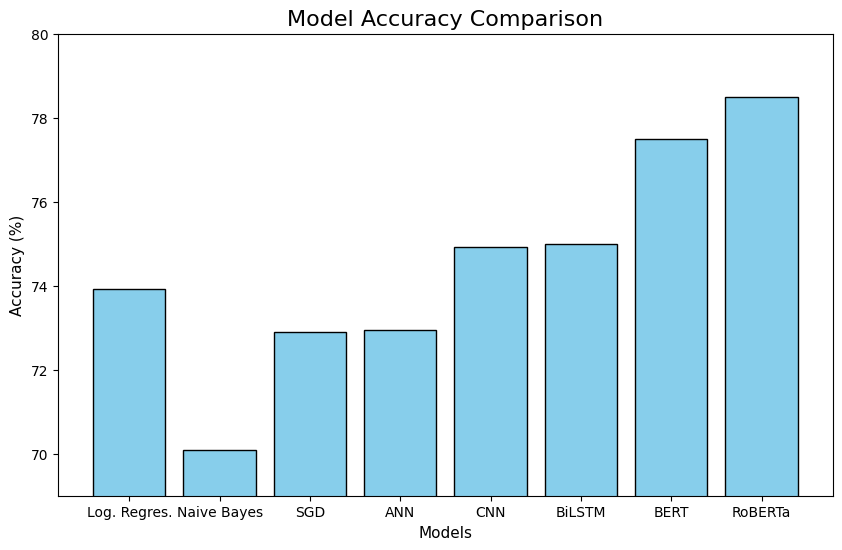

In [ ]:
# Data from the table and new models, ordered as specified
models = ['Log. Regres.', 'Naive Bayes', 'SGD', 'ANN', 'CNN', 'BiLSTM', 'BERT', 'RoBERTa']
accuracies = [73.93, 70.08, 72.90, 72.95, 74.93, 75.0, 77.5, 78.5]

# Create bar graph
plt.figure(figsize=(10,6))

# Create bars with different colors for new models
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')

# Labeling the graph
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=11)
plt.ylabel('Accuracy (%)', fontsize=11)
plt.ylim(69, 80)

# Display the graph
plt.show()

# 6. Topic Modelling of high and low ratings

## Reviews per Score (rating)

<ipython-input-19-20ba61b0a770>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette="viridis")


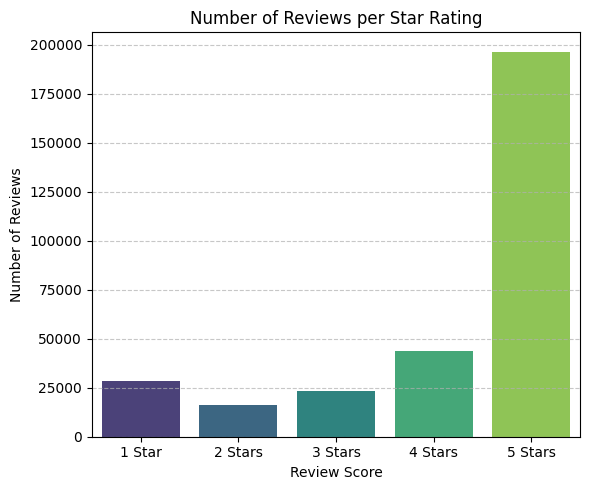

In [ ]:
# Count how many reviews per score
score_counts = df['Score'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x=score_counts.index, y=score_counts.values, palette="viridis")

plt.title("Number of Reviews per Star Rating")
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.xticks([0, 1, 2, 3, 4], labels=["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


5-star reviews dominate the dataset, with almost 200,000 reviews, significantly higher than all others.

1-star reviews are more than the 2-star and 3-star reviews, suggesting people tend to leave reviews when extremely dissatisfied or extremely happy.

## Word Cloud

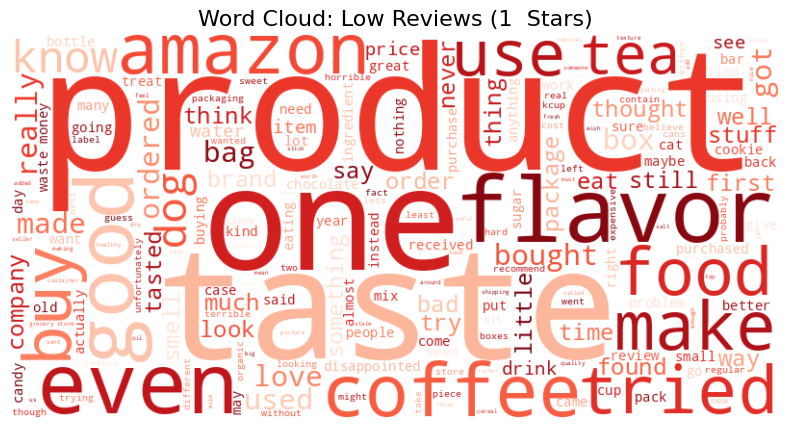

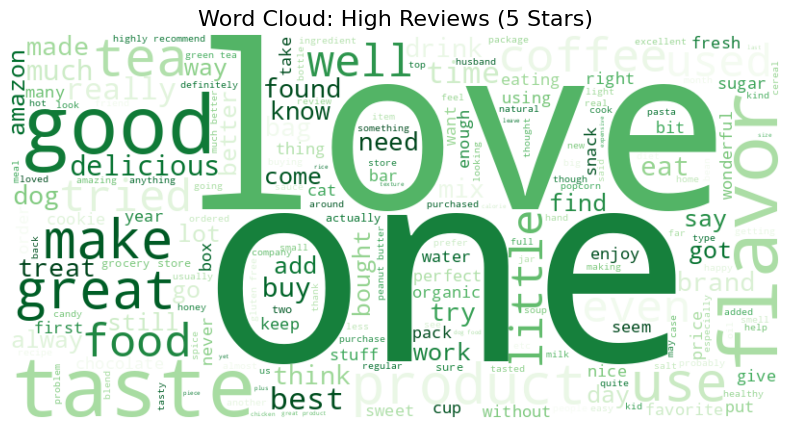

In [ ]:
#  Group Reviews
high_reviews = df[df['Score'].isin([5])].copy()
low_reviews = df[df['Score'].isin([1])].copy()

#  Balance the groups
min_reviews = min(len(high_reviews), len(low_reviews))
high_reviews = high_reviews.sample(n=min_reviews, random_state=42)
low_reviews = low_reviews.sample(n=min_reviews, random_state=42)

#  Convert clean text into a single string for each group
high_text = " ".join(high_reviews['clean_text_nltk'].astype(str))
low_text = " ".join(low_reviews['clean_text_nltk'].astype(str))

#  Generate and Plot Word Clouds
def plot_wordcloud(text, title, colormap):
    wc = WordCloud(width=800, height=400, background_color='white',
                   colormap=colormap, max_words=200).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(low_text, "Word Cloud: Low Reviews (1  Stars)", "Reds")
plot_wordcloud(high_text, "Word Cloud: High Reviews (5 Stars)", "Greens")


Low Reviews (1 star)

Top words: taste, product, flavor, use, make, buy, coffee, amazon, disappointed.

Complaints focus heavily on bad taste or flavor disappointment.
Words like buy, package, box, received, amazon suggest frustration with packaging or purchase experience.
Terms such as dog, smell, small, waste may indicate product defects or size issues.

<br>


High Reviews (5 Stars)

Top words: taste, good, flavor, love, product, one, coffee, great, brand, best

Strong emphasis on positive emotional language like love, great, best, delicious, favorite.
Brand, mix, box, bag appearing here implies satisfaction not just with the product, but with packaging and delivery.
Taste continues to dominate, showing it’s a key factor in both positive and negative reviews — but with opposite sentiment.



## Bigram frequencies

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_bigrams(texts, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    X = vectorizer.fit_transform(texts)
    sum_words = X.sum(axis=0)
    bigrams_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(bigrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

top_bigrams_1 = get_top_bigrams(low_reviews['clean_text_nltk'])
top_bigrams_5 = get_top_bigrams(high_reviews['clean_text_nltk'])

print("Top Bigrams – 1-Star Reviews:", top_bigrams_1)
print("Top Bigrams – 5-Star Reviews:", top_bigrams_5)


Top Bigrams – 1-Star Reviews: [('taste like', 1467), ('tastes like', 1193), ('waste money', 1129), ('tasted like', 657), ('grocery store', 603), ('dog food', 499), ('customer service', 495), ('green tea', 484), ('peanut butter', 471), ('expiration date', 454)]
Top Bigrams – 5-Star Reviews: [('highly recommend', 982), ('grocery store', 686), ('peanut butter', 638), ('gluten free', 637), ('green tea', 609), ('great product', 559), ('really good', 542), ('taste like', 538), ('dog food', 526), ('tastes like', 478)]


1-star bigrams reveal intense dissatisfaction focused on taste, product quality, value for money, and service issues.

5-star bigrams emphasize strong approval, product loyalty, positive comparisons, and health-conscious features (e.g., “gluten free”). Even shared phrases like “taste like” show positive flavor expectations.

### Sentiment Analysis

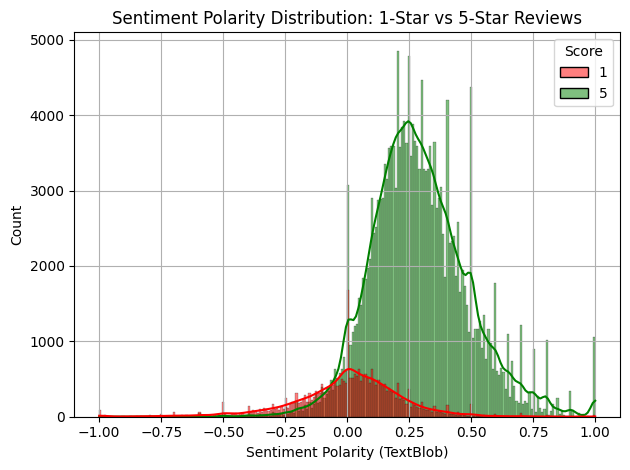

In [ ]:
# Optional libraries to install
# !pip install textblob
from textblob import TextBlob

# Function to get sentiment polarity
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot
sns.histplot(data=df[df['Score'].isin([1, 5])], x='polarity', hue='Score', kde=True, palette={1: "red", 5: "green"})
plt.title("Sentiment Polarity Distribution: 1-Star vs 5-Star Reviews")
plt.xlabel("Sentiment Polarity (TextBlob)")
plt.grid(True)
plt.tight_layout()
plt.show()


Distribution Shape:

1-Star Reviews (Red): Skewed toward the left (negative polarity), showing that low ratings tend to express dissatisfaction, complaints, or negative experiences.

5-Star Reviews (Green): Skewed heavily toward the right (positive polarity), indicating users use more positive and happy language.

## Coherence

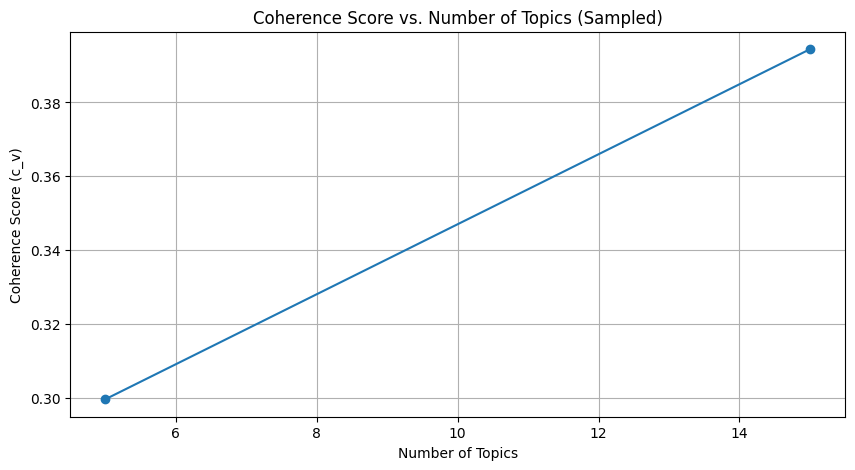

In [ ]:
sampled_df = df.sample(50000, random_state=42)
texts = sampled_df['wordnet_lemmas'].apply(ast.literal_eval).tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

coherence_scores = []
topic_range = (5,15)

for k in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k,
                         random_state=42, passes=5, chunksize=2000)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.title('Coherence Score vs. Number of Topics (Sampled)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.grid(True)
plt.show()


As the number of topics increases from 5 to 15, the coherence score also increases, peaking around 15 topics.

<br>

Coherence scores measure semantic similarity among top words in a topic.

A higher coherence score (around 0.39) at 15 topics means the topics are more interpretable and thematically focused at this level.

## LDA

In [ ]:
df['tokens'] = df['clean_text_nltk'].astype(str).apply(lambda x: x.split())

sampled_df = df.sample(50000, random_state=42)
#  Filter high/low star reviews
five_star = df[df['Score'] == 5].sample(20000, random_state=42)
one_star = df[df['Score'] == 1].sample(20000, random_state=42)

#  Create corpus & dictionary
def prepare_corpus(docs):
    dictionary = corpora.Dictionary(docs)
    dictionary.filter_extremes(no_below=5, no_above=0.5)
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    return dictionary, corpus

dict_5, corpus_5 = prepare_corpus(five_star['tokens'])
dict_1, corpus_1 = prepare_corpus(one_star['tokens'])

#  LDA Models
lda_5 = LdaModel(corpus=corpus_5, id2word=dict_5, num_topics=15, passes=10, random_state=42)
lda_1 = LdaModel(corpus=corpus_1, id2word=dict_1, num_topics=15, passes=10, random_state=42)

#  pyLDAvis
pyLDAvis.enable_notebook()
vis_5 = gensimvis.prepare(lda_5, corpus_5, dict_5)
vis_1 = gensimvis.prepare(lda_1, corpus_1, dict_1)


In [ ]:
# mglearn-Style Topic Keyword Visualization
vect_1 = CountVectorizer(max_features=30000, stop_words="english")
vect_5 = CountVectorizer(max_features=30000, stop_words="english")

X_1 = vect_1.fit_transform(one_star["clean_text_nltk"].astype(str))
X_5 = vect_5.fit_transform(five_star["clean_text_nltk"].astype(str))

lda_sklearn_1 = LatentDirichletAllocation(n_components=10, learning_method="online", random_state=0)
lda_sklearn_5 = LatentDirichletAllocation(n_components=10, learning_method="online", random_state=0)

lda_sklearn_1.fit(X_1)
lda_sklearn_5.fit(X_5)


LatentDirichletAllocation(learning_method='online', random_state=0)

### Visualization of 5 star reviews

In [ ]:
print(" mglearn-style Topics for 5-Star Reviews")
feature_names_5 = np.array(vect_5.get_feature_names_out())
sorting_5 = np.argsort(lda_sklearn_5.components_, axis=1)[:, ::-1]
mglearn.tools.print_topics(topics=range(10),
                           feature_names=feature_names_5,
                           sorting=sorting_5,
                           topics_per_chunk=5,
                           n_words=10)

 mglearn-style Topics for 5-Star Reviews
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
use           product       tea           like          chew          
oil           great         flavor        good          gum           
sauce         amazon        drink         taste         chews         
add           price         taste         great         curry         
hot           buy           like          chocolate     toy           
make          good          flavors       love          working       
mix           love          water         sweet         golden        
red           store         great         really        long          
cooking       time          sugar         eat           chewing       
flavor        order         green         snack         teeth         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      ------

Topic 0 – Cooking Ingredients

Topic 1 – Shopping & Product Satisfaction

Topic 2 – Tea & Flavored Drinks

Topic 3 – Sweet Snacks & Desserts

Topic 4 – Chewable Treats & Pet Toys

Topic 5 – Cat Food & Pet Health

Topic 6 – Dog Food & Treats

Topic 7 – Popcorn & Convenience Snacks

Topic 8 – Healthy Breakfast Items

Topic 9 – Coffee & Brewing Preferences

In [ ]:
vis_5  # High-rating LDA visual

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.003539  0.191013       1        1  10.972161
14     0.053158  0.174936       2        1   9.501949
12     0.095870 -0.025283       3        1   8.875619
4     -0.019675  0.068807       4        1   8.562404
1     -0.040053  0.053405       5        1   7.561033
10     0.013018  0.164715       6        1   6.917093
8      0.056213 -0.131980       7        1   6.762108
2      0.040640 -0.104527       8        1   6.665094
13     0.040131  0.177690       9        1   6.412009
0      0.079790 -0.084648      10        1   5.896787
7      0.090096 -0.122902      11        1   5.704408
11     0.040375 -0.117968      12        1   5.287218
6     -0.058028 -0.113145      13        1   4.884465
5      0.077346 -0.085691      14        1   4.580360
9     -0.472419 -0.044422      15        1   1.417292, topic_info=         Term         Freq        Total Category  logprob  loglift
104       tea  4753.000000  4753.000000  Default  30.0000  30.0000
189    coffee  4350.000000  4350.000000  Default  29.0000  29.0000
300      food  3515.000000  3515.000000  Default  28.0000  28.0000
402    amazon  2953.000000  2953.000000  Default  27.0000  27.0000
110     water  2023.000000  2023.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
672    taking    81.212257   204.464804  Topic15  -4.7832   3.3331
31     health    95.461152   650.015026  Topic15  -4.6216   2.3381
213  benefits    73.692304   227.361102  Topic15  -4.8804   3.1298
930       pop    71.437073   224.267385  Topic15  -4.9115   3.1124
252   looking    64.373318   864.218620  Topic15  -5.0156   1.6593

[1029 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
629       1  0.312288       1
629       4  0.502609       1
629       5  0.037528       1
629       6  0.026806       1
629       8  0.103202       1
...     ...       ...     ...
369      13  0.002551   years
369      14  0.041454   years
322      14  0.989332   yeast
1206      8  0.995268  yogurt
4653     12  0.971147    zico

[2601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 15, 13, 5, 2, 11, 9, 3, 14, 1, 8, 12, 7, 6, 10])


**Topic 1 – Product Usage Experience Over Time**
Frequent mentions of "used", "product", "hair", and "since" suggest this topic reflects long-term product use and routines, possibly in personal care or household categories.

**Topic 2 – Online Shopping & Price Comparison**
Terms like "amazon", "store", "price", "buy", "cheaper", and "grocery" indicate consumer satisfaction with online availability, pricing, and convenience of Amazon compared to local stores.

**Topic 3 – Sweet Snacks & Treats**
This topic is dominated by words like "chocolate", "cookies", "snack", "sweet", and "flavor", highlighting enjoyment of desserts and snacks, especially among kids and families.

**Topic 4 – Quick Meal Preparation**
Key terms include "use", "water", "milk", "microwave", "minutes", and "hot", which clearly point to easy-to-prepare food products such as instant oatmeal, soup, or pasta.

**Topic 5 – Pet Food Preferences**
Words such as "dog", "cat", "formula", "healthy", and "feeding" suggest this topic revolves around pet nutrition and positive outcomes with food for dogs or cats.

**Topic 6 – Dog Treats & Chewing Products**
Mentions of "treat", "chew", "teeth", "bag", "dogs", and "love" indicate satisfaction with chewable dog treats and pet snacks.

**Topic 7 – Tea & Herbal Beverages**
Highly associated with "tea", "flavor", "mint", "chai", "ginger", and "iced", this topic covers positive reviews around different tea varieties and their taste or aroma.

**Topic 8 – Healthy Breakfast & Protein Snacks**
Terms like "cereal", "protein", "bars", "fiber", "healthy", and "granola" show this topic reflects customer satisfaction with nutritious, low-fat breakfast and snack options.


**Topic 9 – Delivery Experience & Product Quality**
Terms like "product", "order", "recommend", "received", "fresh", and "shipping" suggest this topic highlights positive experiences related to quick delivery, item condition, and overall satisfaction with the service and product quality.

**Topic 10 – Coffee Flavors & Preferences**
Mentions of "coffee", "roast", "vanilla", "decaf", "espresso", and "keurig" indicate this topic focuses on diverse coffee varieties and flavors. Users express enjoyment of taste and consistency, often praising specific blends and brewing options.

**Topic 11 – Savory Cooking Ingredients**
Frequent words like "sauce", "rice", "seasoning", "garlic", "noodles", and "meat" show this topic centers around savory meal components. Reviews reflect appreciation for the flavor, quality, and cooking convenience of these ingredients.

**Topic 12 – Refreshing Beverages & Natural Drinks**
Terms such as "water", "juice", "coconut", "soda", "refreshing", and "natural" indicate customer satisfaction with drink options that are tasty and often perceived as healthy. This includes positive sentiments toward flavor variety and hydration benefits.

**Topic 13 – Specialty Spices & Organic Items**
Words like "salt", "organic", "spices", "vegan", "curry", and "natural" reveal a focus on niche, health-oriented ingredients. Customers highlight the value of clean labels, authentic flavor, and dietary preferences like vegan or gluten-free.

**Topic 14 – Baking Essentials & Gluten-Free Options**
Mentions of "flour", "baking", "gluten", "mix", "cake", and "recipe" suggest this topic relates to positive baking experiences. Reviewers often praise the quality and reliability of gluten-free or allergen-friendly baking products.

**Topic 15 – Candy & Unusual Flavors**
Terms such as "gummy", "cherry", "honey", "licorice", "sour", and "molasses" reflect enjoyment of sweets and novelty treats. Customers describe fun, nostalgic, or bold taste experiences across candies and flavor-packed snacks.

### Visualization of 1 star reviews

In [ ]:
print(" mglearn-style Topics for 1-Star Reviews")
feature_names_1 = np.array(vect_1.get_feature_names_out())
sorting_1 = np.argsort(lda_sklearn_1.components_, axis=1)[:, ::-1]
mglearn.tools.print_topics(topics=range(10),
                           feature_names=feature_names_1,
                           sorting=sorting_1,
                           topics_per_chunk=5,
                           n_words=10)

 mglearn-style Topics for 1-Star Reviews
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
ingredients   tea           milk          pods          coffee        
product       green         china         stevia        cup           
sugar         mess          customer      fish          beans         
organic       cake          service       body          vanilla       
natural       cinnamon      rice          health        kcups         
oil           candy         products      use           cups          
corn          red           company       blood         machine       
salt          mix           formula       yeast         instant       
free          make          called        acid          weak          
ingredient    milk          usa           vitamin       kcup          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      ------

Topic 0 – Ingredient Complaints

Topic 1 – Tea Quality Issues

Topic 2 – Product Origin & Safety Concerns

Topic 3 – Pods, Stevia & Side Effects

Topic 4 – Coffee Machine Issues

Topic 5 – Poor Product Quality

Topic 6 – Taste & Texture Dissatisfaction

Topic 7 – Order & Delivery Complaints

Topic 8 – Pet Food & Health Concerns

Topic 9 – Baby Food & Texture Issues

In [ ]:
vis_1  # Low-rating LDA visual

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.134063  0.075448       1        1  20.035134
3      0.089325 -0.115182       2        1  13.292872
9      0.099701 -0.088237       3        1  12.061376
7      0.054634  0.004964       4        1   8.842424
0      0.058117 -0.211577       5        1   7.447086
12    -0.252836 -0.032517       6        1   6.056777
10     0.079321  0.221515       7        1   5.309787
8      0.000025  0.198142       8        1   4.732656
4     -0.123638  0.055721       9        1   4.505727
13     0.141225  0.152988      10        1   4.250643
2      0.151166 -0.035559      11        1   3.848169
6     -0.224589 -0.158319      12        1   2.705532
5      0.084373 -0.182860      13        1   2.630134
1     -0.046282 -0.030384      14        1   2.191090
14    -0.244605  0.145855      15        1   2.090592, topic_info=        Term         Freq        Total Category  logprob  loglift
385   coffee  4545.000000  4545.000000  Default  30.0000  30.0000
368     food  4106.000000  4106.000000  Default  29.0000  29.0000
90       tea  3158.000000  3158.000000  Default  28.0000  28.0000
60     taste  6923.000000  6923.000000  Default  27.0000  27.0000
84      like  9523.000000  9523.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
208    sugar   318.956766  1914.455943  Topic15  -3.9136   2.0756
372     high   194.410379   915.394105  Topic15  -4.4087   2.3183
935    brown   143.941259   482.548304  Topic15  -4.7093   2.6580
789    whole   135.622740  1015.684775  Topic15  -4.7688   1.8543
1401   yeast    84.263840   165.766346  Topic15  -5.2447   3.1911

[1000 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
505       1  0.075835      1
505       2  0.600448      1
505       3  0.215039      1
505       4  0.050903      1
505       5  0.013505      1
...     ...       ...    ...
1401      6  0.488640  yeast
1401     15  0.506737  yeast
6027      2  0.977434   yous
3371     12  0.973616  zevia
5569      7  0.991267   zico

[2514 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 4, 10, 8, 1, 13, 11, 9, 5, 14, 3, 7, 6, 2, 15])

**Topic 1 – Negative Taste & Product Experience**
Terms like "bad", "flavor", "tasted", "smell", "stuff", "reviews" suggest poor product experience, taste disappointment, and general dissatisfaction.

**Topic 2 – Packaging and Delivery Issues**
Mentions of "box", "pack", "item", "bags", "package", and "received" highlight concerns related to quantity, packaging, or incomplete/mismatched deliveries.

**Topic 3 – Pet Product Complaints**
Frequent mentions of "dog", "treats", "sick", "started", "gave", and "vomit" imply adverse reactions in pets, leading to product distrust.

**Topic 4 – Dissatisfaction with Beverages**
Terms like "bottle", "milk", "plastic", "used", "drink", and "changed" indicate beverage quality, taste, or packaging concerns.

**Topic 5 – Return & Customer Service Issues**
Common words such as "refund", "return", "customer", "received", and "disappointed" emphasize frustration with service resolution.

**Topic 6 – Ingredient & Health Concerns**
Frequent use of "ingredients", "organic", "sugar", "soy", and "artificial" suggests distrust or concern about transparency and health impacts.

**Topic 7 – Tea & Beverage Flavor Disappointment**
Terms like "tea", "flavor", "juice", "artificial", "ginger", "lemon", and "sugar" highlight issues with taste and expectations from healthy drinks.

**Topic 8 – Snack Texture & Quality Issues**
Mentions of "cookies", "chocolate", "fat", "protein", "almond", "texture", and "cocoa" reflect dissatisfaction with snack quality or texture.

**Topic 9 – Pet Food & Health Concerns**
Frequent words like "cat", "dog", "meat", "diet", "quality", and "feed" highlight issues related to pet food safety, nutrition, and health impacts.

**Topic 10 – Coffee Machine & Taste Problems**
Words like "coffee", "kcups", "keurig", "flavor", "weak", "brew", and "cup" indicate complaints about taste, brewing devices, or machine compatibility.

**Topic 11 – Stale or Damaged Snacks**
Mentions of "chocolate", "stale", "waste", "nuts", "pieces", "broken", and "box" suggest dissatisfaction due to poor packaging, old stock, or crumbled items.

**Topic 12 – Product Origin & Trust Concerns**
Terms like "china", "label", "company", "fda", "arsenic", "raw", and "trust" reveal concerns around product safety, origin, and brand transparency.

**Topic 13 – Expired or Old Inventory**
Words such as "expiration", "expired", "months", "old", "date", and "purchased" reflect user frustration with receiving expired or near-expiry goods.

**Topic 14 – Haircare & Packaging Complaints**
Mentions of "hair", "shampoo", "scalp", "jar", "plastic", and "lid" show issues with shampoo quality, side effects, or faulty packaging.

**Topic 15 – Gluten-Free & Grain-Based Food Issues**
Frequent terms like "gluten", "cereal", "syrup", "sugar", "flour", "mix", and "pasta" point to texture, sweetness, or ingredient complaints in grain-heavy or diet-specific foods.



###  Comparative Topic Insights: 5-Star vs 1-Star Reviews

| **Aspect**              | **5-Star Reviews**                                                | **1-Star Reviews**                                                |
|-------------------------|-------------------------------------------------------------------|-------------------------------------------------------------------|
| **Taste**               | Positive sentiment (e.g., _delicious_, _loved_, _great flavor_)  | Negative sentiment (e.g., _bitter_, bad)        |
| **Product Quality**     | Fresh, satisfying, good consistency                               | Expired, inedible,                           |                    |
| **Ingredients**         | Organic, fresh | Artificial
| **Beverage Experience** | _Coffee_, _tea_, _herbal drinks_ praised for richness and aroma   | Complaints about _decaf_, _bitter taste_, _machine pods_         |
| **Categories**          | Breakfast cereals, baby food, chocolate, snacks                   | Pet food, sauces, expired items, mislabeled products             |
| **Health Focus**        | Mentions of _digestive benefits_, _low fat_, _protein snacks_     | Complaints about _sugar_, _cholesterol_, _allergies_, _pain_     |
| **Emotions Expressed**  | _Love_, _favorite_, _happy_, _best_, _amazing_                    | _Disappointed_, _waste_, _gross_, _never again_                  |


In [ ]:
def plot_topic_distribution_with_keywords(lda_model, corpus, dictionary, title="Topic Distribution"):
    # Get dominant topic for each document
    dominant_topics = [max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus]
    topic_counts = pd.Series(dominant_topics).value_counts().sort_index()

    # Get top 3 words per topic
    topic_keywords = []
    for topic_id in range(lda_model.num_topics):
        top_words = lda_model.show_topic(topic_id, topn=3)
        top_words = ", ".join([word for word, prob in top_words])
        topic_keywords.append(f"Topic {topic_id}\n({top_words})")

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=topic_keywords, y=topic_counts.values, palette="mako")
    plt.title(title)
    plt.ylabel("Number of Reviews")
    plt.xlabel("Topics (Top 3 Words)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


<ipython-input-13-0604a522f84e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_keywords, y=topic_counts.values, palette="mako")


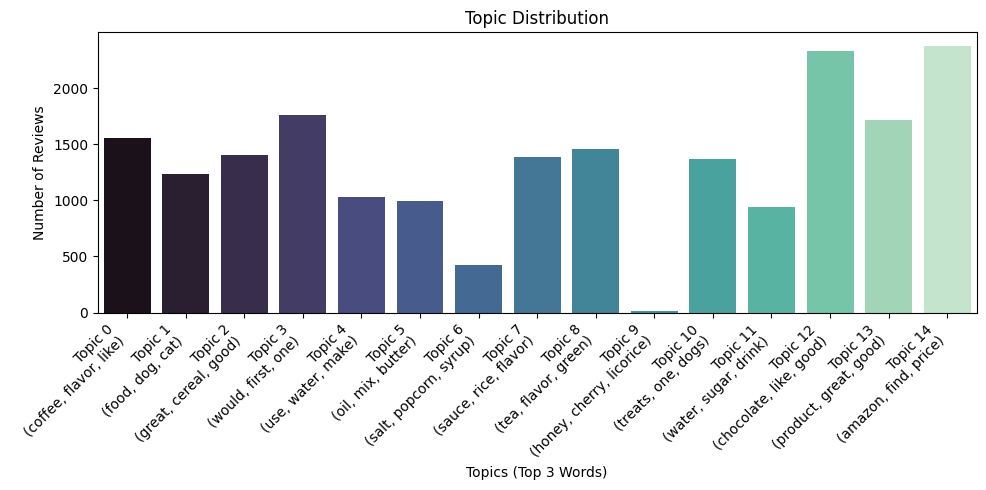

<ipython-input-13-0604a522f84e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_keywords, y=topic_counts.values, palette="mako")


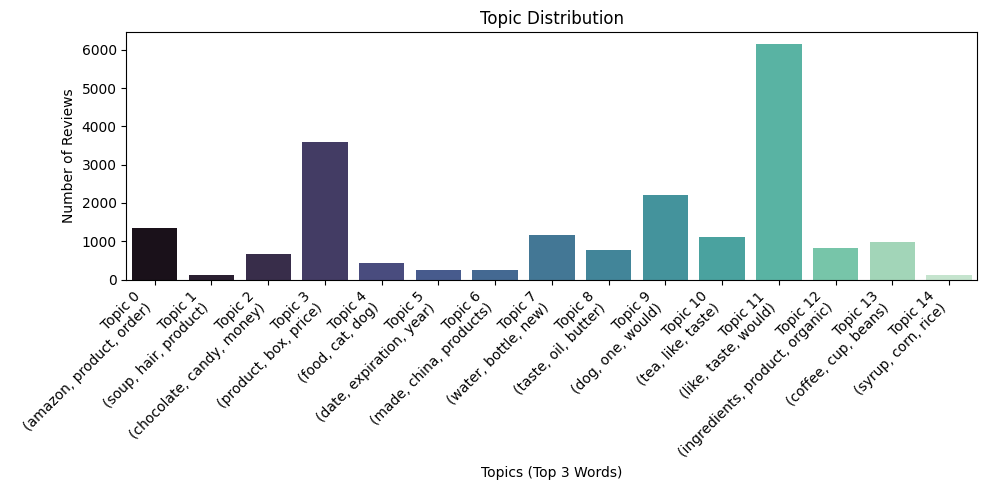

In [ ]:
plot_topic_distribution_with_keywords(lda_5, corpus_5, "Topic Distribution in 5-Star Reviews")
plot_topic_distribution_with_keywords(lda_1, corpus_1, "Topic Distribution in 1-Star Reviews")


## Latent Semantic Analysis (LSA)
 LSA components showed dimension-specific semantic themes

<ipython-input-8-e72fea114b75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette='viridis')


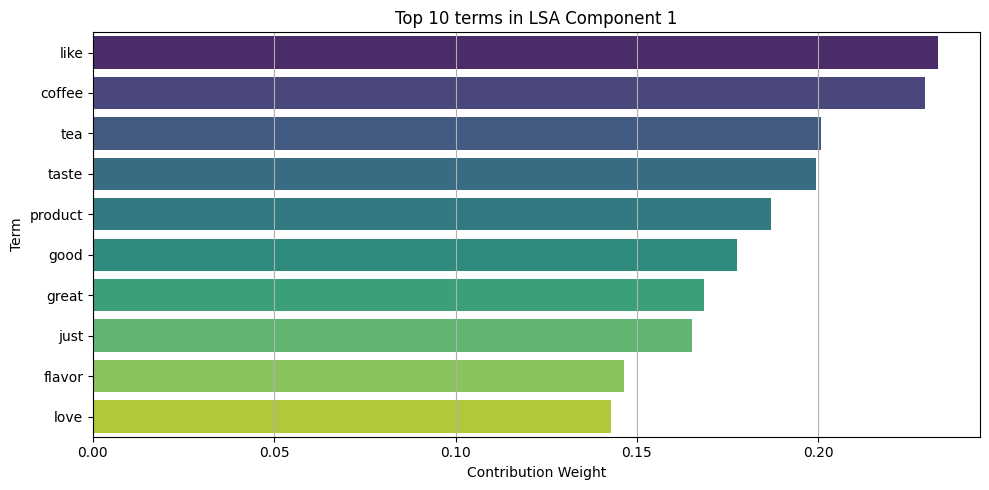

<ipython-input-8-e72fea114b75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette='viridis')


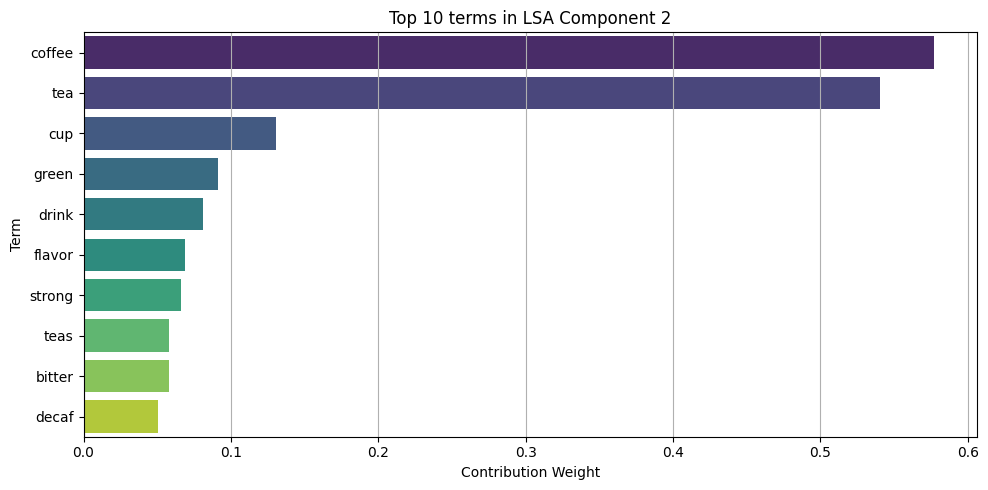

In [ ]:
# Get the components and feature names
terms = tfidf_vectorizer.get_feature_names_out()
components = lsa.components_

# Plot top contributing terms for each component
num_top_words = 10
for i, comp in enumerate(components):
    terms_in_comp = zip(terms, comp)
    sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:num_top_words]
    labels, values = zip(*sorted_terms)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(values), y=list(labels), palette='viridis')
    plt.title(f"Top {num_top_words} terms in LSA Component {i+1}")
    plt.xlabel("Contribution Weight")
    plt.ylabel("Term")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


In Latent Semantic Analysis (LSA), each component (also called a latent topic or dimension) represents a hidden concept or theme that captures patterns in how words co-occur across documents.


Component 1 is the first principal dimension capturing the strongest pattern in the data.

Component 2 is orthogonal to Component 1 and captures the second most significant pattern, which is different from the first.

<br>

Component 1: General Sentiment & Product Experience. This component captures general sentiment and satisfaction, especially with flavor, taste, and emotion words like “like”, “love”, “good”, and “great”.

 Component 2: Beverages – Coffee and Tea Preferences. The presence of words like strong, bitter, decaf, green, flavor shows that this theme reflects detailed preferences or criticisms around beverage strength.

## Coherence score

In [ ]:
from gensim.models import CoherenceModel

coherence_5 = CoherenceModel(model=lda_5, texts=five_star['tokens'], dictionary=dict_5, coherence='c_v').get_coherence()
coherence_1 = CoherenceModel(model=lda_1, texts=one_star['tokens'], dictionary=dict_1, coherence='c_v').get_coherence()

print("Coherence Score – 5:", coherence_5)
print("Coherence Score – 1:", coherence_1)


Coherence Score – 5: 0.4656517165812302
Coherence Score – 1: 0.49534394661324865


Higher coherence in 1-star reviews (0.49) means the topics from negative reviews are more semantically focused.This could be due to users being more specific when they have a bad experience with a product (e.g., “expired,” “bitter,” “refund”).

Lower coherence in 5-star reviews (0.45) suggests that positive reviews are more diverse in what users appreciate:
Example: taste, price, packaging, or health benefits. The topics are more scattered and less cohesive, which is typical for positive feedback.

## Extra Insights

**Topic Overlap**

Across both sentiment categories, some overlapping categories were identified (e.g., coffee, tea), but sentiment polarity was inverted. 5-star coffee topics centered around aroma and richness, while 1-star topics focused on bitterness, weak flavor, or machine compatibility issues. Similarly, while pet food appeared in both sets, 1-star reviews included concerns like "vomiting," "moldy," and "sick" — compared to "healthy" and "vet-recommended" in positive reviews. This reflects divergent expectations — people want different things from similar products.



| **Term**         | **5-Star Context**                      | **1-Star Context**                          |
|------------------|------------------------------------------|---------------------------------------------|
| `coffee`         | "blend", "strong", "blend"      | "bitter",  "machine"     |
| `dog food`       | "healthy", "vet recommended"             | "vomiting", "problem"                 |
| `green tea`      | "refreshing", "flavor"         | "tastes", " authentic"             |



The presence of words like “hair” in 1-star review topics related to food products may suggest significant hygiene concerns or potential product mix-ups. Such mentions often reflect contamination issues that severely impact customer trust and highlight lapses in manufacturing or packaging standards. These types of complaints are critical as they directly relate to safety, cleanliness, and consumer health.

## Conclusion

The topic modeling clearly demonstrates distinct themes between high and low reviews. While 5-star reviews focus on flavor satisfaction, trust in ingredients, and ease of use, 1-star reviews highlight negative emotions around product quality, delivery, and misleading information. The presence of shared topics like coffee or tea under different reviews reveals differences in user expectations.


<br>

### Summary Insights
- Most Frequent Topics: Coffee, tea, pet food, packaging, and snacks occurred repeatedly in both star groups, highlighting them as critical product categories.

- Clear Divergence in Topics: 5-star reviews praise taste, brand trust, and health-conscious purchases. 1-star reviews criticize flavor, delivery, value for money, and pet product safety.

- 5-Star Reviews: Displayed more diversity, touching on convenience, health benefits, and product loyalty. Users praised flavor, aroma, brand satisfaction, and packaging.

- 1-Star Reviews: More focused complaints, often about product quality (spoiled, moldy), misleading packaging, or adverse effects (pets getting sick, poor delivery). High Coherence of Negative Reviews: Narrow and specific (0.47 coherence) — likely to influence future buyers more due to detailed, trust-damaging complaints.

- Vocabulary & Emotion Trends: Words like “delicious,” “love,” and “favorite” dominated high ratings, while “disappointed,” “refund,” and “waste” were central to low ratings—showing strong affective differences.

# Conclusion

This project delivered a comprehensive analysis of Amazon product reviews using a range of text analytics techniques. Initial data exploration revealed patterns like class imbalance due to the dominance of 5-star reviews. In the text preprocessing phase, techniques such as tokenization, stopword removal, stemming, and lemmatization were compared. WordNet lemmatizer was selected for its semantic accuracy. Vector space modeling followed, where both CountVectorizer and TF-IDF representations were constructed. Subsequently, in model training and evaluation, several classifiers were trained and optimized using hyperparameter tuning. Logistic Regression and ANN showed competitive performance. The project progressed to sequence modelling, where deep learning architectures such as BiLSTM, BERT and RoBERTa. RoBERTa outperformed others with ~80% accuracy after fine-tuning, demonstrating the effectiveness of contextual embeddings for reviews classification. Topic modeling using word clouds, coherence scores, LDA and LSA visualizations, revealing thematic differences. In conclusion, the project effectively combined traditional and deep learning models to extract valuable insights from large-scale review data.